In [18]:
# configuration parameters for Times square
last_data_date = 'Now'
duration_in_day = 5
OverViewOnly = True

In [19]:
from matplotlib import pyplot as plt

from lsst_efd_client import EfdClient,resample
import numpy as np
import pandas as pd
import datetime 
import pytz
timezone = pytz.utc
from math import isnan
import asyncio


In [20]:
# initialisation from 
if last_data_date == 'Now':
    last_data_date_val = datetime.datetime.now(datetime.UTC)
else:
    last_data_date_val = datetime.datetime.fromisoformat(last_data_date+'T00:00:00+00:00')
first_data_date_val = last_data_date_val - datetime.timedelta(days=duration_in_day)
#
tstart=first_data_date_val.isoformat()
tend=last_data_date_val.isoformat()
# save plot on file
save_fig=False
# show plot on screen 
show_it = True
#
day_ref=datetime.datetime.fromisoformat(tstart).replace(tzinfo=None)
print( 'we will analyse data between ',tstart,' and ',tend,' using FES configuration at ', day_ref)
run_cur='%s_%s' % (first_data_date_val.isoformat(),last_data_date_val.isoformat())
#
# ------------- initialisation 
# --- Manual configuration  ( to be edited by hand )  
#
#
output_data='/home/a/antilog/public_html/LsstCam/fes/'
#
# --- Automated configuration 
client = EfdClient('usdf_efd')
#
if save_fig  :
    print('Output will be saved in %s%s' % (output_data,run_cur))
#---------
manual=False
#
socket_name=[]
for i in range(5) : 
    socket_name.append('socket%d' % (i+1))
#


we will analyse data between  2025-11-25T18:39:54.030794+00:00  and  2025-11-30T18:39:54.030794+00:00  using FES configuration at  2025-11-25 18:39:54.030794


In [21]:
# FES configuration initilisation ===========================
filter_ok='ugrizyph'
#filter_ok='u'

# ----new  configuration the 24th Nov 2025 
# ------ new carousel rotation recovery & warm-up break after 5h of un-used 


# ----new unlock carousel current configuration the 24th Nov 2025 
# ------ Socket 1: 4600 ==> 4500 , 2: 4600 ==> 4100 , 3: 4600 . 4: 4600 == > 4500 .5: 4600 ==> 4100 

carCl_date=[
   { 'date':datetime.datetime.fromisoformat('2022-09-19 18:52') , 'socket':[-4660,-4660,-4660,-4660,-4660] } ,    
   { 'date':datetime.datetime.fromisoformat('2025-07-09 14:58') , 'socket':[-4900,-4660,-4660,-4900,-4660]} ,
   { 'date':datetime.datetime.fromisoformat('2025-11-05 16:31') , 'socket':[-4600,-4600,-4600,-4600,-4600] } ,
   { 'date':datetime.datetime.fromisoformat('2025-11-24 14:25') , 'socket':[-4500,-4100,-4600,-4500,-4100] } ]

carCL_current=carCl_date[0]['socket']
for socket_day in carCl_date :
    if (day_ref-socket_day['date']).total_seconds() < 0 : break
    carCL_current=socket_day['socket']
   

# carousel socket location : 
# ------ 2025-05-02 15:55  
# socket=[4196800,3324500,2451800,1579500,707070]
# ------ 2025-05-06 19:28
# socket=[4196800,3324500,2451800,1579700,707070]
# ------ 2025-10-09 16:22
# socket=[4196800,3324500,2452000,1579700,707070]
# ------ 2025-10-14 11:13
# socket=[4196940,3324500,2452000,1579700,707070]
# ------ start test on car angle 2025-10-01 11:13 ? 

socket_date =[ 
   { 'date':datetime.datetime.fromisoformat('2025-05-02 15:55') , 'socket':[4196800,3324500,2451800,1579500,707070] } ,    
   { 'date':datetime.datetime.fromisoformat('2025-05-06 19:28') , 'socket':[4196800,3324500,2451800,1579700,707070]} ,
   { 'date':datetime.datetime.fromisoformat('2025-10-09 16:22') , 'socket':[4196800,3324500,2452000,1579700,707070] } ,
   { 'date':datetime.datetime.fromisoformat('2025-10-14 11:13') , 'socket':[4196940,3324500,2452000,1579700,707070] } ]

socket=socket_date[0]['socket']
for socket_day in socket_date :
    if (day_ref-socket_day['date']).total_seconds() < 0 : break
    socket=socket_day['socket']

# AutoChanger push per socket : 
# before the second of may lots of filter arround ... I give up to follow 
# 2025-05-02 15:55
# ACoffset=[0,300,500,0,800]    u
# ACoffset=[0,300,500,0,0]    y
# 2025-05-06 19:28
# ACoffset=[0,300,500,400,800]    u
# ACoffset=[0,300,500,400,0]    y
# from 2025-10-09 16:27  , y
# ACoffset=[0,0,0,0,0]
# 2025-10-14 11:13       , y 
# ACoffset=[0,0,0,-300,0]
# 2025-10-20 16:10  , y 
# ACoffset=[200,0,0,-400,0]
# from 11 Nov 2025 16:00 UTC  , u
# ACoffset=[200,0,0,-400,500]

ACoffset_date=[
    { 'date':datetime.datetime.fromisoformat('2025-05-02 15:55') , 'ACoffsetU':800, 'ACoffset':[0,300,500,0,0] } ,
    { 'date':datetime.datetime.fromisoformat('2025-05-06 19:28') , 'ACoffsetU':800, 'ACoffset':[0,300,500,400,0] } ,
    { 'date':datetime.datetime.fromisoformat('2025-10-09 16:27') , 'ACoffsetU':0, 'ACoffset':[0,0,0,0,0] } ,
    { 'date':datetime.datetime.fromisoformat('2025-10-14 11:13') , 'ACoffsetU':0, 'ACoffset':[0,0,0,-300,0] } ,
    { 'date':datetime.datetime.fromisoformat('2025-10-20 16:10') , 'ACoffsetU':500, 'ACoffset':[200,0,0,-400,0] } ]
    
ACoffset=ACoffset_date[0]['ACoffset']
ACoffsetU=ACoffset_date[0]['ACoffsetU']
for ACoffset_day in ACoffset_date :
    if (day_ref-ACoffset_day['date']).total_seconds() < 0 : break
    ACoffset=ACoffset_day['ACoffset']
    ACoffsetU=ACoffset_day['ACoffsetU']


    
print('with carousel config \n === Socket Standby  : ',socket,'\n === AC offset : ',ACoffset ,' Extra offset U ',ACoffsetU,'\n we will select event with filter(s)',filter_ok )

ACStandby=1004000





with carousel config 
 === Socket Standby  :  [4196940, 3324500, 2452000, 1579700, 707070] 
 === AC offset :  [200, 0, 0, -400, 0]  Extra offset U  500 
 we will select event with filter(s) ugrizyph


In [22]:
#
def SaveFig(fig,File,run_cur='',raft_cur='',ccd_cur='',hdu=''):
    if len(hdu)==0 : 
        root_plt=os.path.join(output_data,run_cur,raft_cur,ccd_cur)
    else : 
        hdu_cur='%s' % (hdu)
        root_plt=os.path.join(output_data,run_cur,raft_cur,ccd_cur,hdu_cur)
    # 
    PlotFile=File.replace('.','_')
    PlotFile=PlotFile.replace(' ','_')
    os.makedirs(root_plt,exist_ok=True)
    plotfile=os.path.join(root_plt,PlotFile)
    print ('PlotFile=',plotfile)
    fig.savefig(plotfile,bbox_inches='tight')
    plt.close(fig) 
    return


In [23]:
async def read_db(query,verbose=False,clean=True) :
    if verbose : print(query)
    db_in =  await client.influx_client.query(query)
    for col in db_in.columns :
        len_col=len(db_in[db_in[col].notnull()])
        if clean :
            if len_col==0 : 
                db_in.drop(columns=[col],inplace=True)
                txt='dropped'
            else :
                txt='kept'
        else :
            txt='kept'  
        if verbose : print('%s (%s) = %d ' % (col,txt,len_col) )
    return db_in 

In [24]:
#
query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '%s' AND time < '%s'  AND "Controller"='accelerobf' AND "Canbus"='canbus0' AND "Agent"='fcs' ''' % (tstart,tend)
accelero =  await read_db(query)
#
query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '%s' AND time < '%s'  AND "Controller"='carouselController' AND "Canbus"='canbus0' AND "Agent"='fcs' ''' % (tstart,tend)
car_controler =  await read_db(query)
#
query = ''' SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_autochanger_two_trucks" WHERE time > '%s' AND time < '%s'  AND "Agent"='fcs' AND "Hardware"='autochanger' '''%  (tstart,tend)
act =  await read_db(query)
#========= We want to put the X+ and X- controler in // , at the same event , so we identify them separatly and merge them afterward 
query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '%s' AND time < '%s'  AND  "Controller"='acTruckXplusController' AND "Canbus"='canbus0' AND "Agent"='fcs' ''' % (tstart,tend)
acp_controler =  await read_db(query)
#
query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '%s' AND time < '%s'  AND "Controller"='acTruckXminusController' AND "Canbus"='canbus0' AND "Agent"='fcs' ''' % (tstart,tend)
acm_controler =  await read_db(query)
#
query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_carousel_clamp" WHERE  time > '%s' AND time < '%s'  AND  "Hardware"='carousel' AND "Agent"='fcs' ''' % (tstart,tend)
clamp = await read_db(query)
#
#========= fill the DB for unlock data 
query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '%s' AND time < '%s' AND "Agent"='fcs' AND "Canbus"='canbus0' AND ("Controller"='clampXminusController' OR "Controller"='clampXplusController') AND "Hardware"='carousel' ''' % (tstart,tend)
cl_car  = await read_db(query)
#
query = ''' SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_autochanger_two_latches" WHERE time > '%s' AND time < '%s'  AND "Agent"='fcs' AND "Hardware"='autochanger' '''%  (tstart,tend)
acl =  await read_db(query)

# This is the solution if we want them both in a serial way 
# query = '''SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '%s' AND time < '%s'  AND  ( "Controller"='acTruckXplusController' OR  "Controller"='acTruckXminusController' ) AND "Canbus"='canbus0' AND "Agent"='fcs' ''' % (tstart,tend)
# ac_controler =  await read_db(query)
# --- create a set of variable , useful for the plots 

ac_merged=pd.merge_asof(acp_controler,acm_controler,   left_index=True, right_index=True, by=["Agent","Canbus","Hardware"] ,suffixes=('_p', '_m'), tolerance=pd.Timedelta("15ms"),direction='nearest' )
act_acc=pd.merge_asof(ac_merged,act,left_index=True, right_index=True, by=["Agent"] ,suffixes=('', '_act'), tolerance=pd.Timedelta("100ms"),direction='nearest' )
ac_car=pd.merge_asof(act_acc,car_controler,left_index=True, right_index=True, by=["Agent","Canbus"] ,suffixes=('_ac', '_car'), tolerance=pd.Timedelta("15ms"),direction='nearest' )
ac_carcl=pd.merge_asof(ac_car,clamp,left_index=True, right_index=True, by=["Agent"] ,suffixes=('_ac', '_cl'), tolerance=pd.Timedelta("15ms"),direction='nearest' )
#
s=[]

# allowed offset for car : becarefull if you scanned car postion ...
dcar=500 

for i in range(5) : 
  s.append(ac_car[(ac_car["position_m"]>970000 ) & (abs(ac_car["position"]-socket[i])<dcar) ])

#

#
if manual :
    state_m=ac_car['state_m'].to_numpy()
    indexc_step=np.argwhere((state_m[0:-1]=='READY_TO_SWITCH_ON') & (state_m[1:] == 'OPERATION_ENABLE') )[:,0]
    indexc_pre_standby=ac_car.iloc[indexc_step+1][abs(ac_car['position_m'].iloc[indexc_step+1]-970000)<1000].index
else :
    velocityc=ac_car['profileVelocity_m'].to_numpy()
    indexc_step=np.argwhere((velocityc[0:-1]==260) & ( (velocityc[1:] == 50) | (velocityc[1:] == 35 )))[:,0]
    indexc_pre_standby=ac_car.iloc[indexc_step+1][abs(ac_car['position_m'].iloc[indexc_step+1]-970000)<1000].index
indexc_before=indexc_pre_standby-pd.Timedelta("1s")
indexc_before5=indexc_pre_standby-pd.Timedelta("5s")
indexc_1s_before_pre_standby=ac_car.index[ac_car.index.get_indexer(indexc_before,method='nearest')]
indexc_5s_before_pre_standby=ac_car.index[ac_car.index.get_indexer(indexc_before5,method='nearest')]
indexc_after10=indexc_pre_standby+pd.Timedelta("10s")
indexc_10s_after_pre_standby=ac_car.index[ac_car.index.get_indexer(indexc_after10,method='nearest')]

#
index_in_clamp=[]
indexcf_pre_standby=indexc_pre_standby.copy()
idel=0
for i in range(len(indexc_10s_after_pre_standby)) : 
    try :
        index_in_clamp.append((ac_car.loc[indexc_pre_standby[i]:indexc_10s_after_pre_standby[i]][ac_car.loc[indexc_pre_standby[i]:indexc_10s_after_pre_standby[i]]["state_m"]=="SWITCH_ON_DISABLED"].index)[0])
    except:
        print("no end of clamping for a start at pre_staby at ",indexc_pre_standby[i],"for index ",i)
        print(len(indexcf_pre_standby))
        indexcf_pre_standby=indexcf_pre_standby.delete(i-idel)
        print(len(indexcf_pre_standby))
        idel+=1

index_in_clampp1s=np.array(index_in_clamp)+pd.Timedelta("1s")
index_in_clampp5s=np.array(index_in_clamp)+pd.Timedelta("5s")


SELECT * FROM "lsst.MTCamera"."autogen"."lsst.MTCamera.fcs_canbus_controller" WHERE  time > '2025-11-25T18:39:54.030794+00:00' AND time < '2025-11-30T18:39:54.030794+00:00'  AND "Controller"='accelerobf' AND "Canbus"='canbus0' AND "Agent"='fcs' 
Agent (kept) = 61313 
Canbus (kept) = 61313 
Controller (kept) = 61313 
Hardware (kept) = 61313 
accelerationX (kept) = 61225 
accelerationY (kept) = 61225 
accelerationZ (kept) = 61225 
airmass (kept) = 61225 
angularVelocityX (kept) = 61225 
angularVelocityY (kept) = 61225 
angularVelocityZ (kept) = 61225 
averageCurrent (dropped) = 0 
azimut (kept) = 61225 
brakeActivated (dropped) = 0 
current (dropped) = 0 
elevation (kept) = 61225 
errorHistoryNB (kept) = 61313 
errorRegister (kept) = 88 
followingError (dropped) = 0 
gravity (kept) = 61225 
inError (kept) = 61313 
lastErrorCode (kept) = 61313 
lastErrorName (dropped) = 0 
mode (dropped) = 0 
normalizedAccelerationX (kept) = 61225 
normalizedAccelerationY (kept) = 61225 
normalizedAcceler

In [25]:
def plot_clamp(iplt=0,x=None,y=None,index_begin=None,delta_begin=None,index_end=None,left=None,right=None,bottom=None,top=None, filter_ok='ugrizyph',label_type=0,file_extra='',save_fig=True,show_it=True):
    # what do we plot : 
    multi=False
    if '_' in x :
        xp='%sp' % (x)
        xm='%sm' % (x)
        multi=True
    else : 
        xp=xm='%s' % (x) 
    if '_' in y : 
        yp='%sp' % (y)
        ym='%sm' % (y)
        multi=True
    else :
        yp=ym='%s' % (y) 
        
    #
    val=x
    for i in range(2) :           
        if val=='position_' :
            txt='Truck Position'
        elif val=='current_' :
            txt='Truck Current'
        elif val=='lockStatus_cl':
            txt='Clamp Lock Status'
        elif val=='filterPositionSensorValue_cl':
            txt='Filter Position in Clamp'
        elif val=='lockSensorValue_cl' :
            txt='Clamp Lock Sensor Value'
        elif  val=='CarouselPosToSocket':
            txt='Carousel distance to Socket (in micron)' 
        elif val=='velocity_' :
            txt='Truck Velocity'
        elif val=='deltaDriverFollowerPosition' :
            txt='AC truck X- - truck X+ postion diffrence (in micron)'  
        elif val=='time' :
            txt='Time (s) since Trucks at 970 000'
            if iplt<10 or val==y :
                print('ERROR: time should be used as an X argument , with iplt >=10 ') 
                return 
        else:
            print(val,' is unknow quantity to plot, we stop')
            return
        if i==0 : 
            xtxt=txt
        else : 
            ytxt=txt
        val=y
    # 
    if iplt==11 :
        offset_txt='(shifted by carousel offset *10 )'
        file_extra='_offset_car'+file_extra
    elif iplt==12 :
        offset_txt='(shifted by telescope elevation *10)'
        file_extra='_offset_elevation'+file_extra
    elif iplt==13 :
        offset_txt='(shifted by delta AC trucks * 30)'
        file_extra='_offset_detlaAC'+file_extra
    elif iplt==14 :
        offset_txt='(shifted  by Filter position at the end of clamp-Off * 5 )'
        file_extra='_offset_filterPos'+file_extra  
    elif iplt==15 :
        offset_txt='(shifted  by Truck position-expected *10  at the end of clamp )'
        file_extra='_offset_TruckPos'+file_extra     
    elif iplt==16 :
        offset_txt='(shifted  by time since last unlock)'
        file_extra='_offset_deltaLock'+file_extra     
    else :
        offset_txt=''
    #      
    fig=plt.figure(figsize=(20,15))
    if len(file_extra) > 0 :
        title='%s %s vs  %s as Clamping on Carousel (%s) \n for a period from %s to %s UTC \n red-cyan=> X- lock recovery  , orange-purple=> X- filter presence  bellow 8000  2s after truck X- passed by 970 000  ,  green-blue=> Ok   ' % (ytxt,offset_txt,xtxt,file_extra,tstart,tend)
    else : 
        title='%s %s vs  %s as Clamping on Carousel \n for a period from %s to %s UTC \n red-cyan=> X- lock recovery  , orange-purple=> X- filter presence  bellow 8000  2s after truck X- passed by 970 000  ,  green-blue=> Ok   ' % (ytxt,offset_txt,xtxt,tstart,tend)
    if len(file_extra)>0 : 
        file='%sVS%s_%s' % (y.split('_')[0],x.split('_')[0],file_extra)
    else :
        file='%sVS%s' % (y.split('_')[0],x.split('_')[0])
    fig.suptitle(title)
    for iso in range(5) : 
        sock='socket%d' % (iso+1) 
        plt.subplot(3,2,iso+1,title=sock)
        ac_clall=pd.merge_asof(clamp[(clamp['Socket']==sock) & (clamp['Clamp']=='Xminus') ],clamp[(clamp['Socket']==sock) & (clamp['Clamp']=='Xplus') ],left_index=True, right_index=True, by=["Agent"] ,suffixes=('_clm', '_clp'), tolerance=pd.Timedelta("60ms"),direction='nearest' )
        ac_car_cls=pd.merge_asof(ac_clall,ac_car,left_index=True, right_index=True, by=["Agent"] ,suffixes=('', '_car'), tolerance=pd.Timedelta("60ms"),direction='nearest' )
    #    ac_car_clm=pd.merge_asof(ac_car,clamp[(clamp['Socket']==sock) & (clamp['Clamp']=='Xminus') ],left_index=True, right_index=True, by=["Agent"] ,suffixes=('', '_clms'), tolerance=pd.Timedelta("60ms"),direction='nearest' )
    #    ac_car_cls=pd.merge_asof(ac_car_clm,clamp[(clamp['Socket']==sock) & (clamp['Clamp']=='Xplus') ],left_index=True, right_index=True, by=["Agent"] ,suffixes=('_clm', '_clp'), tolerance=pd.Timedelta("60ms"),direction='nearest' )
        #col_rename={}
        #col_rename['timestamp_clms']='timestamp_clm'
        #ac_car_cls.rename(columns=col_rename, inplace=True)    
        legende=True
        for i in range(len(index_begin)) : 
            ca_sel=ac_car_cls.loc[index_begin[i]:index_end[i]][ (abs(ac_car_cls.loc[index_begin[i]:index_end[i]]["position"]-socket[iso])<300)  ]
        #   
            iloc_idx = acl.index.get_indexer([indexcf_pre_standby[i]], method='nearest')  # return the filter in AC at this time 
            filter_closest=acl.iloc[iloc_idx]['filterName'].values[0]
        #    
            plot_it=False
            if filter_closest in filter_ok and len(ca_sel)>0 and   ca_sel.iloc[0]["filterPositionSensorValue_clm"] > 8000 :
                    #
                    colorm='g'
                    colorp='b'                
                    #
                    time_m=(ca_sel['timestamp_m'].to_numpy()-ca_sel['timestamp_m'].iloc[0])/1000.
                    i2s=np.argmin(abs(time_m-2.))
                    lock2s=ca_sel["lockSensorValue_clm"].to_numpy()[i2s]
                    if lock2s <8000. : 
                        colorm='orange'
                        colorp='purple'
                    if  len(cl_car.loc[index_in_clamp[i]:index_in_clampp5s[i]][( cl_car.loc[index_in_clamp[i]:index_in_clampp5s[i]]["state"]=="OPERATION_ENABLE") & (cl_car.loc[index_in_clamp[i]:index_in_clampp5s[i]]["Controller"]=="clampXminusController")])>0 :
                        colorm='r'
                        colorp='cyan'
                    if label_type==0 : 
                        if multi :
                            labelm='X-:red,orange,green'
                            labelp='X+:cyan,purple,blue'
                        else :
                            labelm='red(rec),orange(bad),green(good)'
                    elif label_type==1 :
                        if multi :
                            labelp='X+ %s' %(list(ca_sel.index)[0])
                            labelm='X- %s' %(list(ca_sel.index)[0])
                        else :
                            labelp='%s' %(list(ca_sel.index)[0])
                    #      
                    if iplt==0 :                     
                        if legende or label_type==1 :
                            plt.plot(ca_sel[xm],ca_sel[ym],color=colorm,label=labelm) 
                            if multi : plt.plot(ca_sel[xp],ca_sel[yp] ,color=colorp,label=labelp) 
                            legende=False
                        else : 
                            plt.plot(ca_sel[xm],ca_sel[ym] , color=colorm) 
                            if multi : plt.plot(ca_sel[xp],ca_sel[yp] ,color=colorp)       
                        plt.plot(ca_sel[xm],ca_sel[ym],'.',color=colorm) 
                        plt.plot(ca_sel.iloc[-1][xm],ca_sel.iloc[-1][ym],'x',color=colorm) 
                        if multi :plt.plot(ca_sel[xp],ca_sel[yp],'.',color=colorp) 
                        if multi :plt.plot(ca_sel.iloc[-1][xp],ca_sel.iloc[-1][yp],'x',color=colorp) 
                    elif iplt<10 :
                        if iplt==1 :
                            yy=ca_sel["position"].to_numpy()-socket[iso] 
                        elif iplt==2 :
                            yy=ca_sel['position_m']-ca_sel['position_p']    
                        #   
                        if legende or label_type==1:
                            plt.plot(ca_sel[xm],yy,color=colorm,label=labelm) 
                            #plt.plot(ca_sel[xp],yy,color=colorp,label='X+:cyan,purple,blue') 
                            legende=False
                        else : 
                            plt.plot(ca_sel[xm],yy , color=colorm) 
                            #plt.plot(ca_sel[xp],yy ,color=colorp)       
                        plt.plot(ca_sel[xm],yy,'.',color=colorm) 
                        plt.plot(ca_sel.iloc[-1][xm],yy[-1],'x',color=colorm)
                    elif iplt>=10 :
                        # compute the time between pre-standby and end of truck move 
                        ac_stop_time=(index_in_clamp[i]-indexcf_pre_standby[i]).total_seconds()
                        x_m=(ca_sel['timestamp_m'].to_numpy()-ca_sel['timestamp_m'].iloc[0])/1000.
                        x_p=(ca_sel['timestamp_p'].to_numpy()-ca_sel['timestamp_p'].iloc[0])/1000.
                        # offset to transform a 2D plot in ~3d     
                        offsetm=0.
                        offsetp=0.    
                        if iplt==11 :
                            off=ca_sel["position"].iloc[0]-socket[iso]
                            offsetm=off*10
                            offsetp=offsetm
                            if label_type==2 :
                                if multi :
                                    labelm='X- car. %d' % (off)
                                    labelp='X+ car. %d' % (off)
                                else :
                                    labelm='car. %d' % (off)                              
                        elif iplt==12 :
                            # get elevation     
                            target_time=ca_sel.index[0]
                            # Find the absolute integer index position
                            iloc_index = accelero.index.get_indexer([target_time], method='nearest')[0]
                            # Get the corresponding timestamp from the index
                            elevation=accelero.iloc[iloc_index]['elevation']
                            offsetm=elevation*10
                            offsetp=offsetm
                            if label_type==2 :
                                if multi :
                                    labelm='X- ele. %d' % (elevation)
                                    labelp='X+ ele. %d' % (elevation)
                                else :
                                    labelm='ele. %d' % (elevation)
                        elif iplt==13 :
                            delta_truck=ca_sel.iloc[0]['position_m']-ca_sel.iloc[0]['position_p']
                            offsetm=(delta_truck)*30 
                            offsetp=offsetm
                            if label_type==2 :
                                if multi :
                                    labelm='X- del. %d' % (delta_truck)
                                    labelp='X+ del. %d' % (delta_truck)
                                else :
                                    labelm='delta Tr. %d' % (delta_truck)
                                    
                        elif iplt==14 :
                            offsetm=(ca_sel.iloc[-1]["filterPositionSensorValue_clm"]-1400)*5    
                            offsetp=(ca_sel.iloc[-1]["filterPositionSensorValue_clp"]-1000)*5     
                            if label_type==2 :
                                if multi :
                                    labelm='X- fil. %d' % (ca_sel.iloc[-1]["filterPositionSensorValue_clm"])
                                    labelp='X+ fil. %d' % (ca_sel.iloc[-1]["filterPositionSensorValue_clp"])
                                else :
                                    labelm='filter %d' % (ca_sel.iloc[-1]["filterPositionSensorValue_clm"])                                
                        elif iplt==15 :
                            if filter_closest=='u' :
                                TotStand=ACStandby + ACoffset[iso]+ ACoffsetU
                            else : 
                                TotStand=ACStandby + ACoffset[iso]
                            offset_m=(ac_car_cls.loc[indexcf_pre_standby[i]:index_in_clampp1s[i]]['position_m'].max()- TotStand)
                            offset_p=(ac_car_cls.loc[indexcf_pre_standby[i]:index_in_clampp1s[i]]['position_p'].max()- TotStand) 
                            offsetm=offset_m*30
                            offsetp=offset_p*30
                            if label_type==2 :
                                if multi :
                                    labelm='X- Off. %d' % (offset_m)
                                    labelp='X+ Off. %d' % (offset_p)
                                else :
                                    labelm='Car Off. %d' % (offset_m)
                        elif iplt==16 :
                            offsetm=delta_begin[i]
                            offsetp=offsetm
                            if label_type==2 :
                                if multi :
                                    labelm='X- Off. %d s' % (offsetm)
                                    labelp='X+ Off. %d s' % (offsetp)
                                else :
                                    labelm='delta Off. %d s' % (offsetm)
                        if iplt <20 :         
                            if ca_sel[ym].dtypes !='O' :
                                y_m=ca_sel[ym]+offsetm
                            else :
                                y_m=ca_sel[ym]
                            if ca_sel[yp].dtypes !='O' :
                                y_p=ca_sel[yp]+offsetp
                            else :
                                y_p=ca_sel[yp]
                        elif iplt== 20 : 
                            y_p=y_m=ca_sel['position_m']-ca_sel['position_p']
                            
                        #
                        if legende or label_type!=0 :
                            plt.plot(x_m,y_m,color=colorm,label=labelm) 
                            if multi : plt.plot(x_p,y_p,color=colorp,label=labelp) 
                            legende=False
                        else : 
                            plt.plot(x_m,y_m,color=colorm) 
                            if multi : plt.plot(x_p,y_p,color=colorp)       
                        plt.plot(x_m,y_m,'.',color=colorm) 
                        if multi : plt.plot(x_p,y_p,'.',color=colorp)
                        ymin=min(y_m)
                        ymax=max(y_m)
                        plt.plot([ac_stop_time,ac_stop_time],[ymin,ymax],'-.',color='black')
                        
                    else :
                        print('unknow type of plot iplt=',iplt,'. We stop')
                        return
                    plot_it=True
            #plt.xlim(-500,500)
            if plot_it : 
                plt.legend()
                plt.xlabel(xtxt)
                plt.ylabel(ytxt)
                if left != None :
                    plt.xlim(left=left)
                if right != None :
                    plt.xlim(right=right)
                if bottom != None :
                    plt.ylim(bottom=bottom)
                if top != None :
                    plt.ylim(top=top)
    if show_it : plt.show()
    if save_fig : SaveFig(fig,File=file,run_cur=run_cur,raft_cur='ClampOnCarousel')

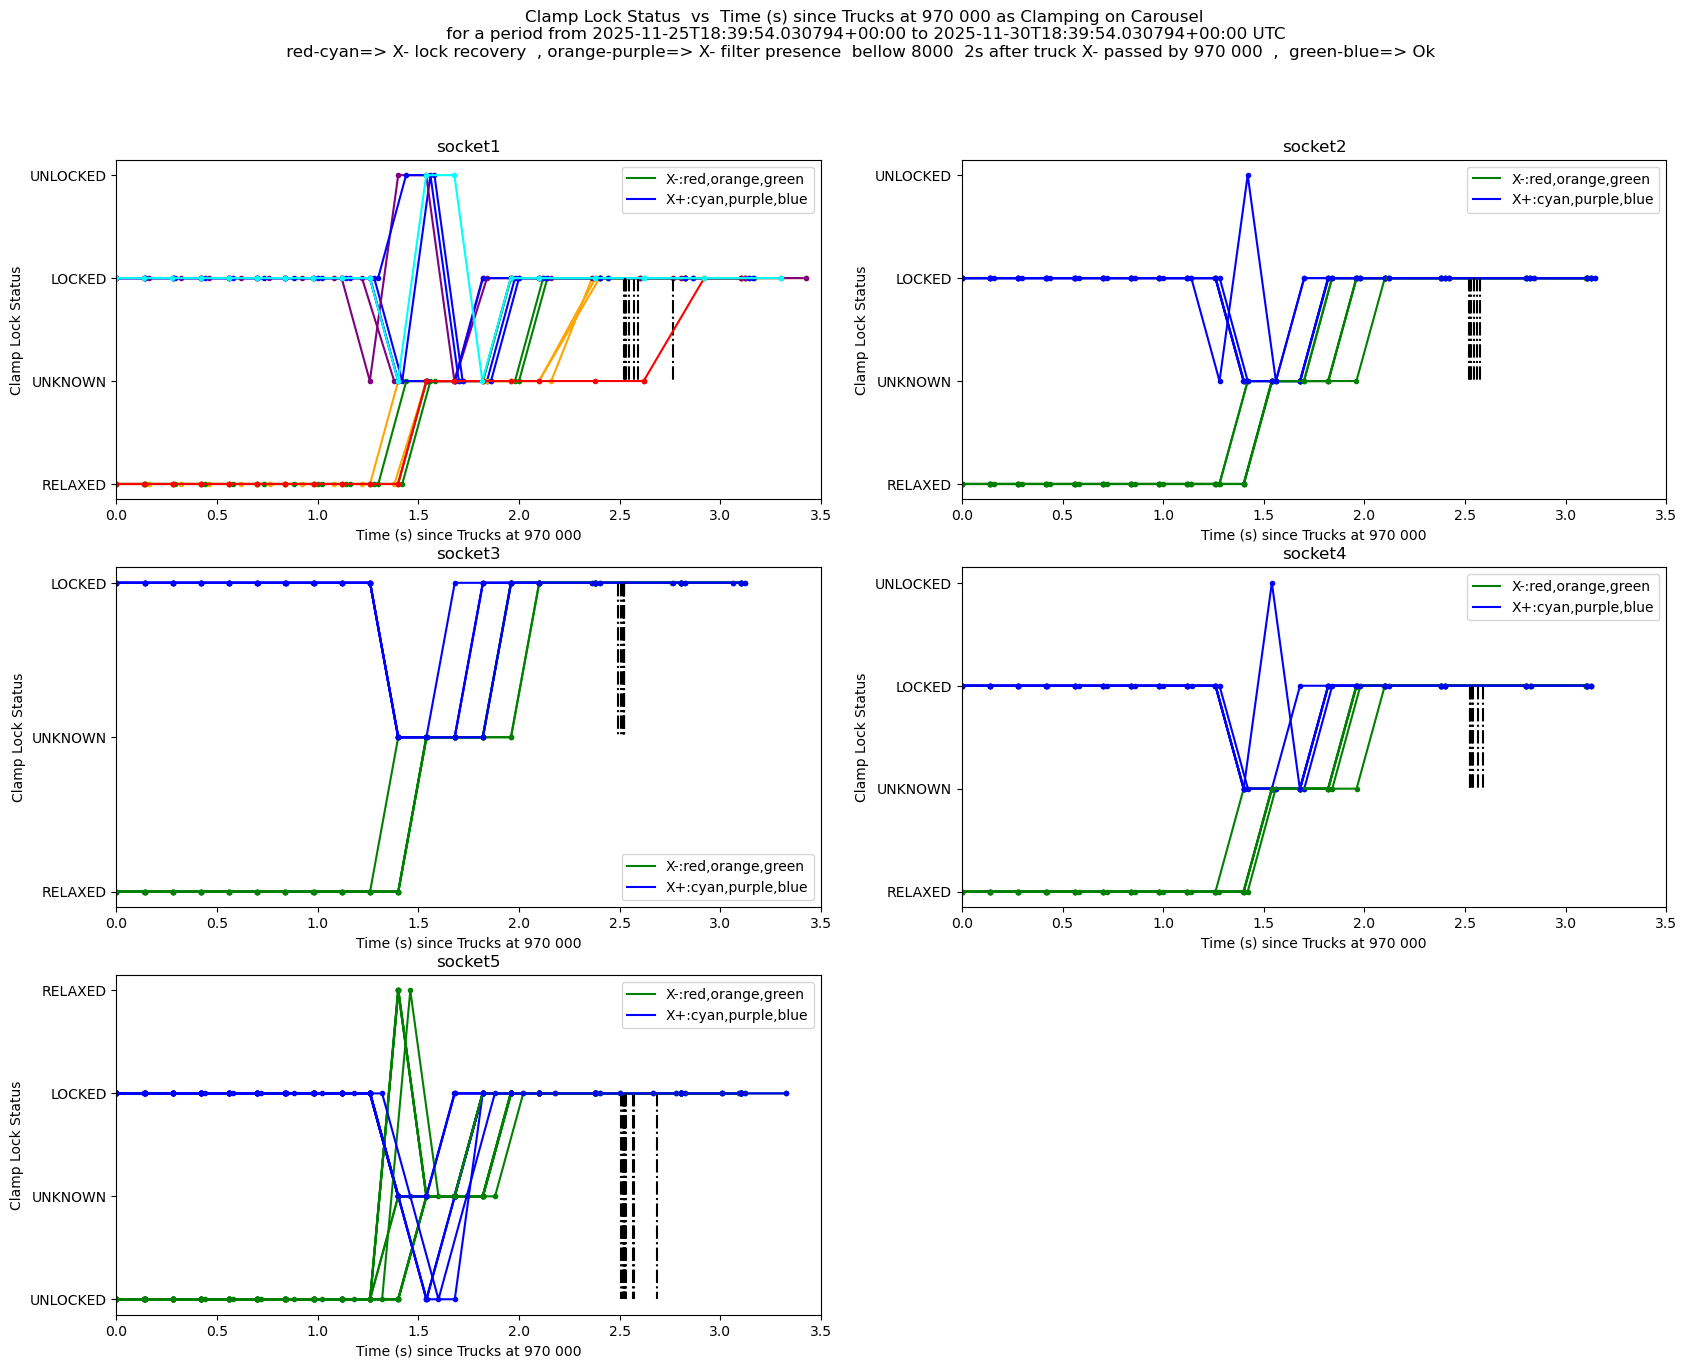

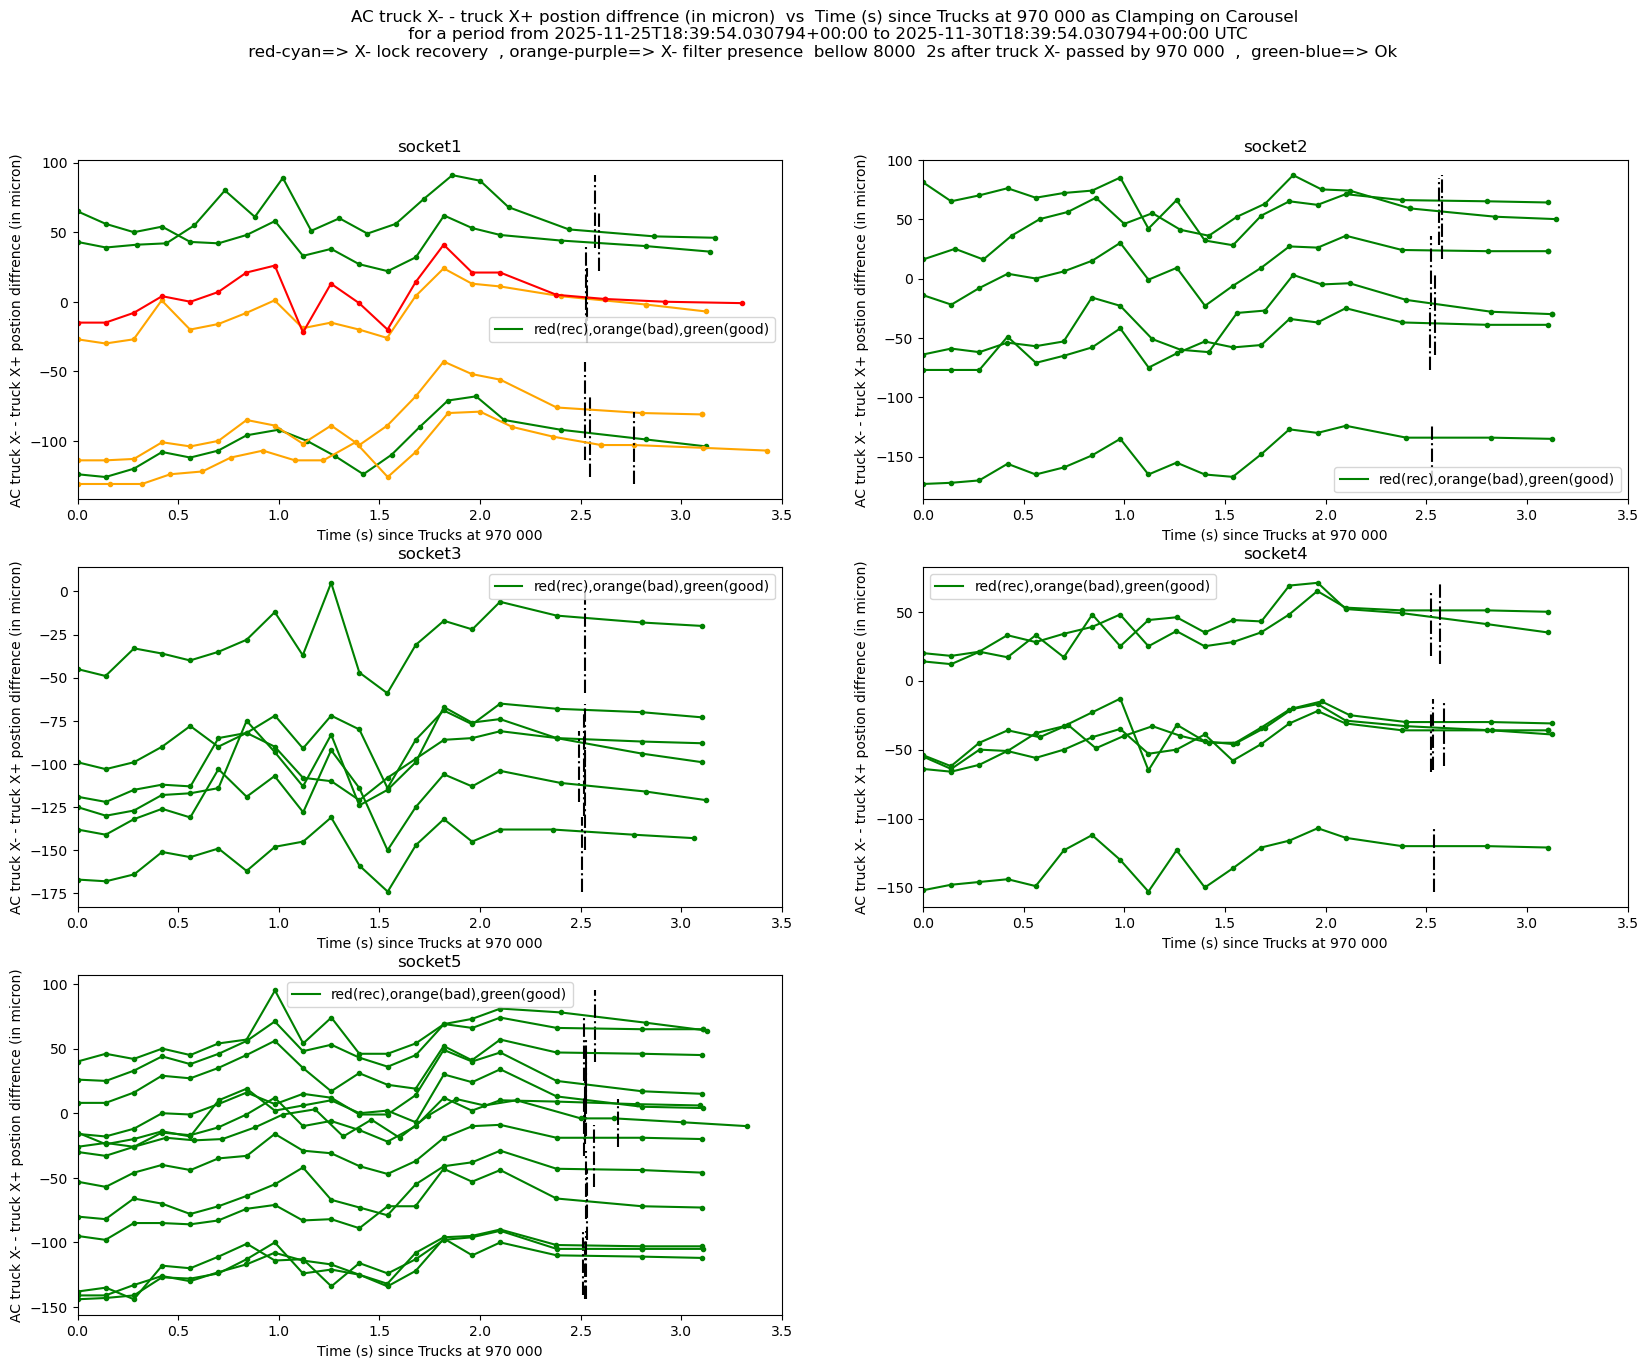

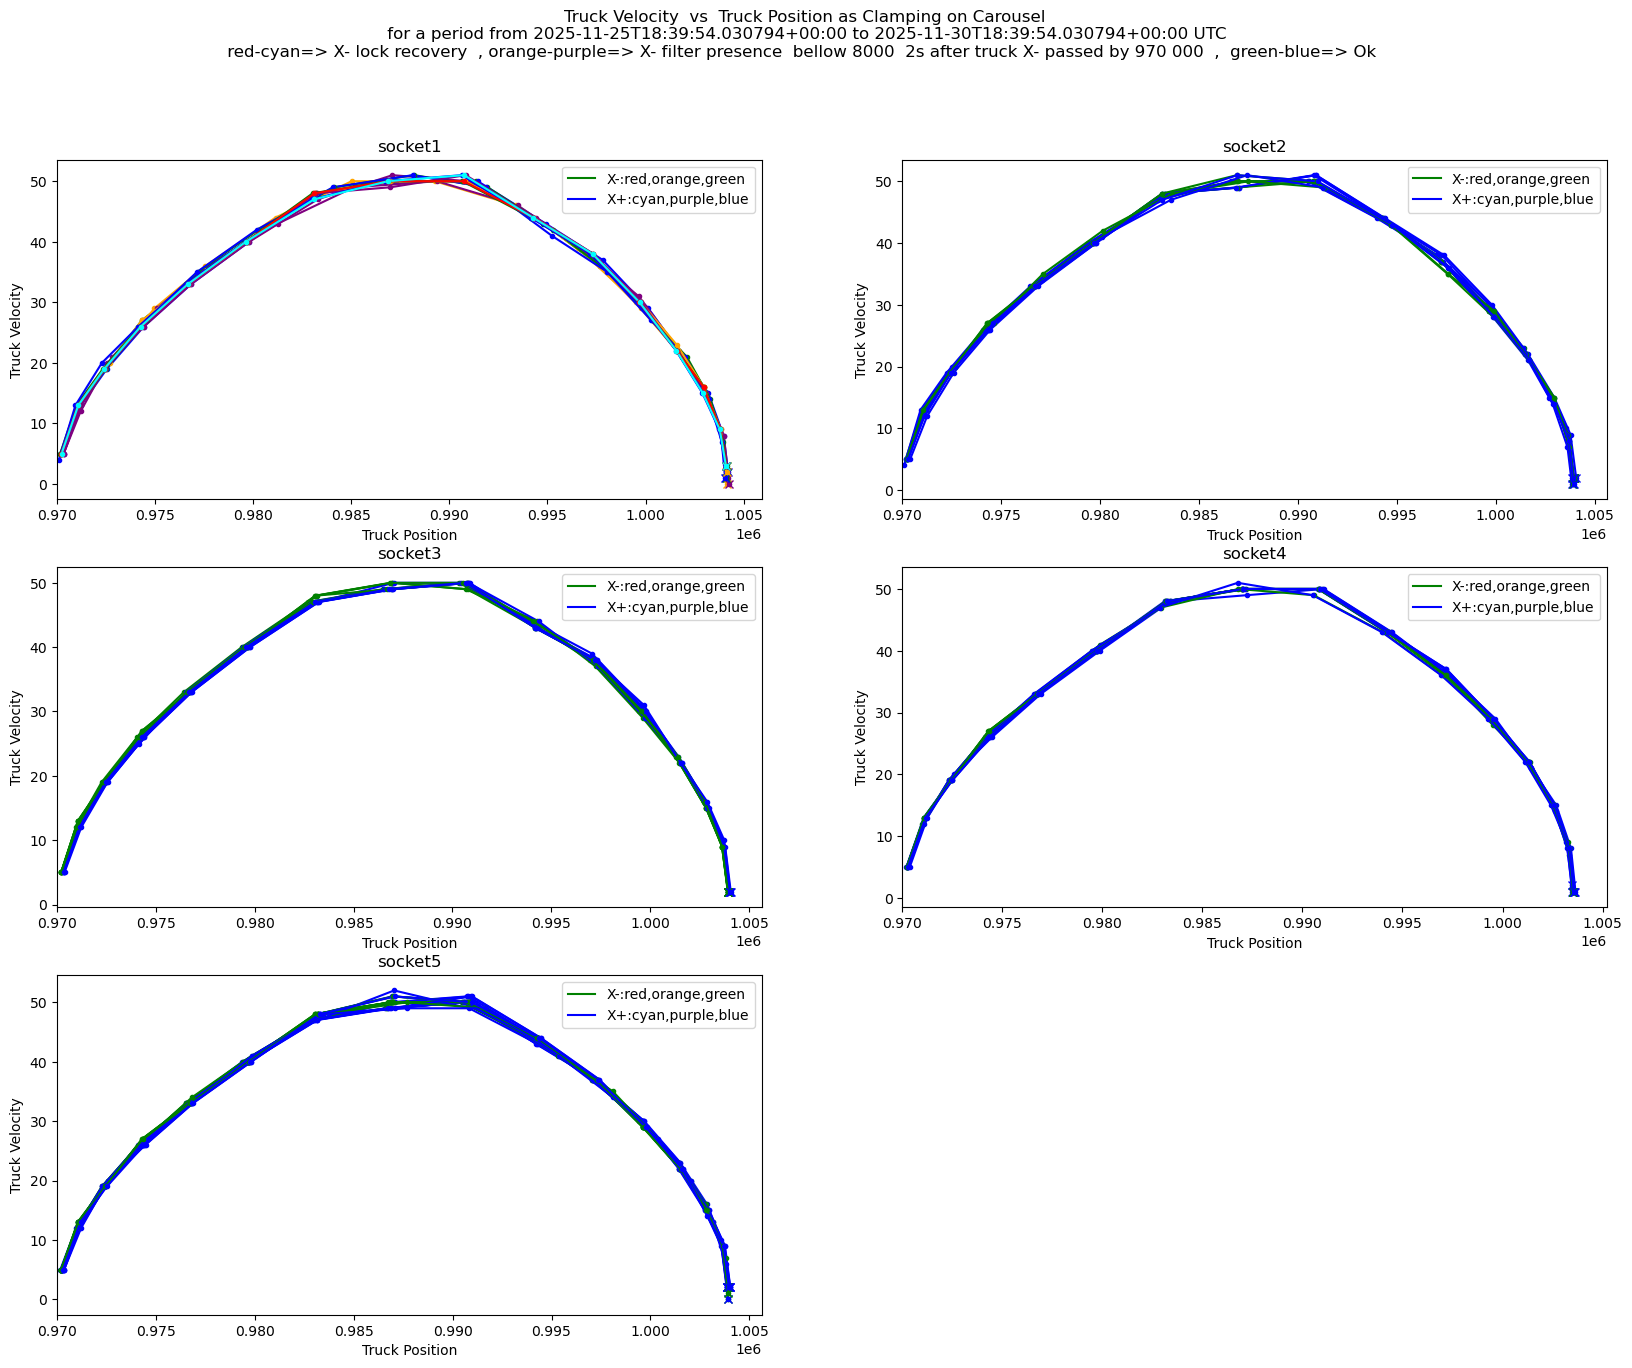

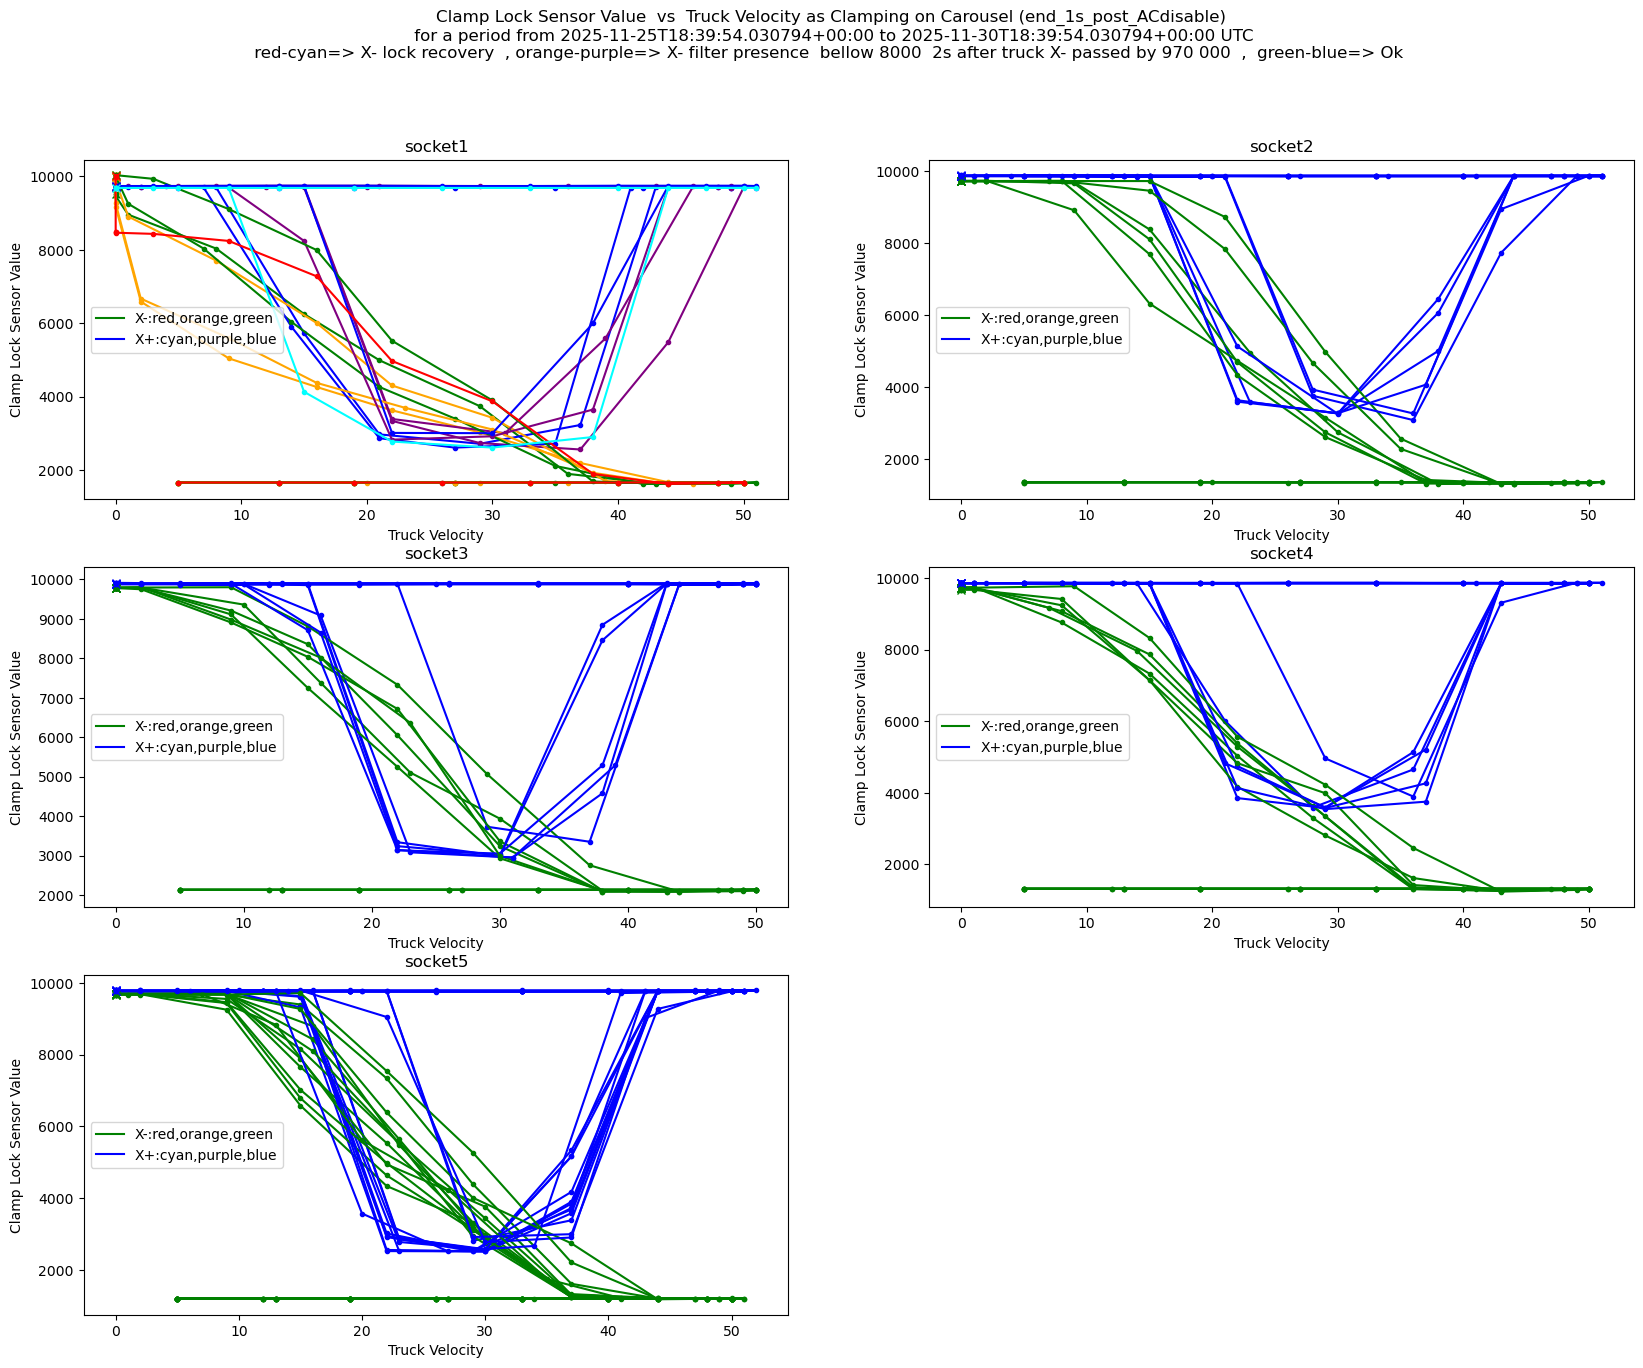

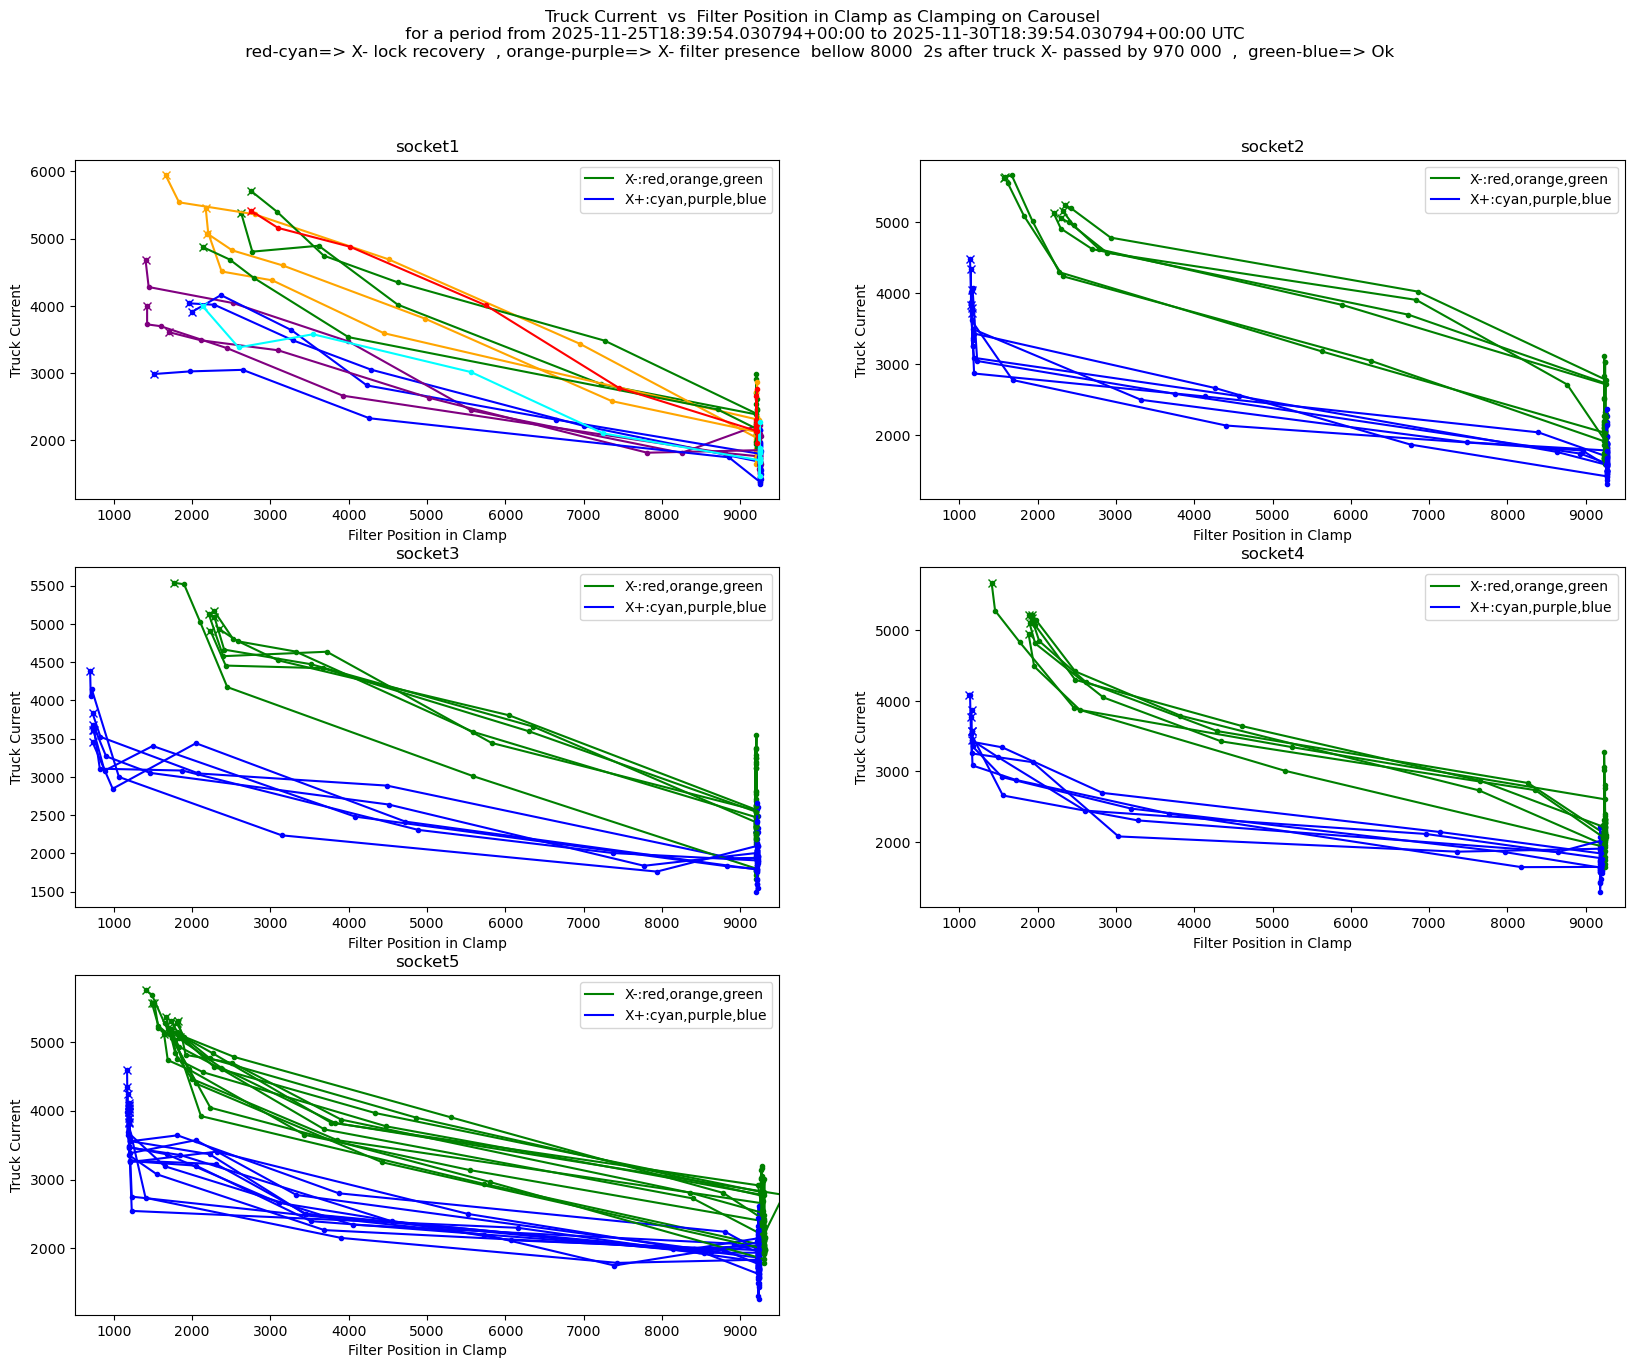

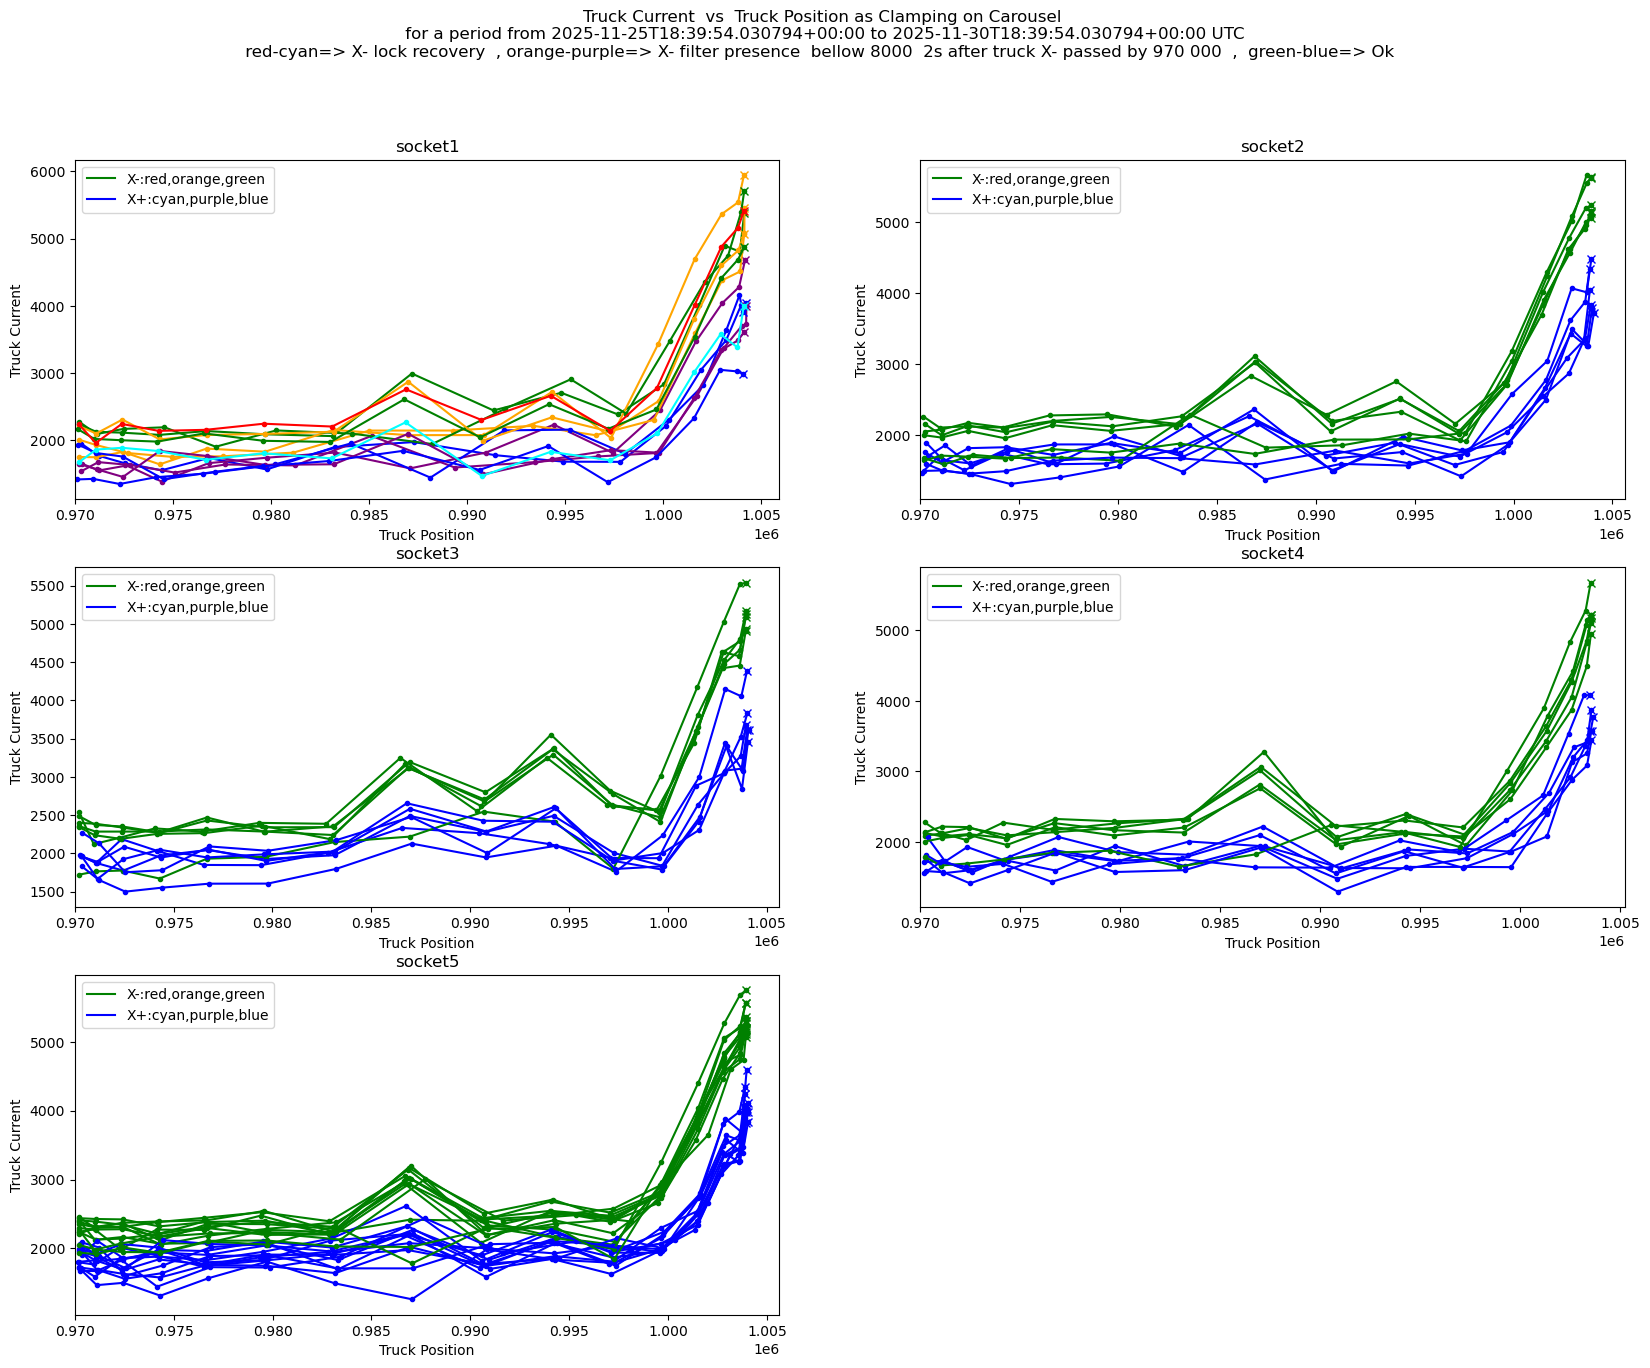

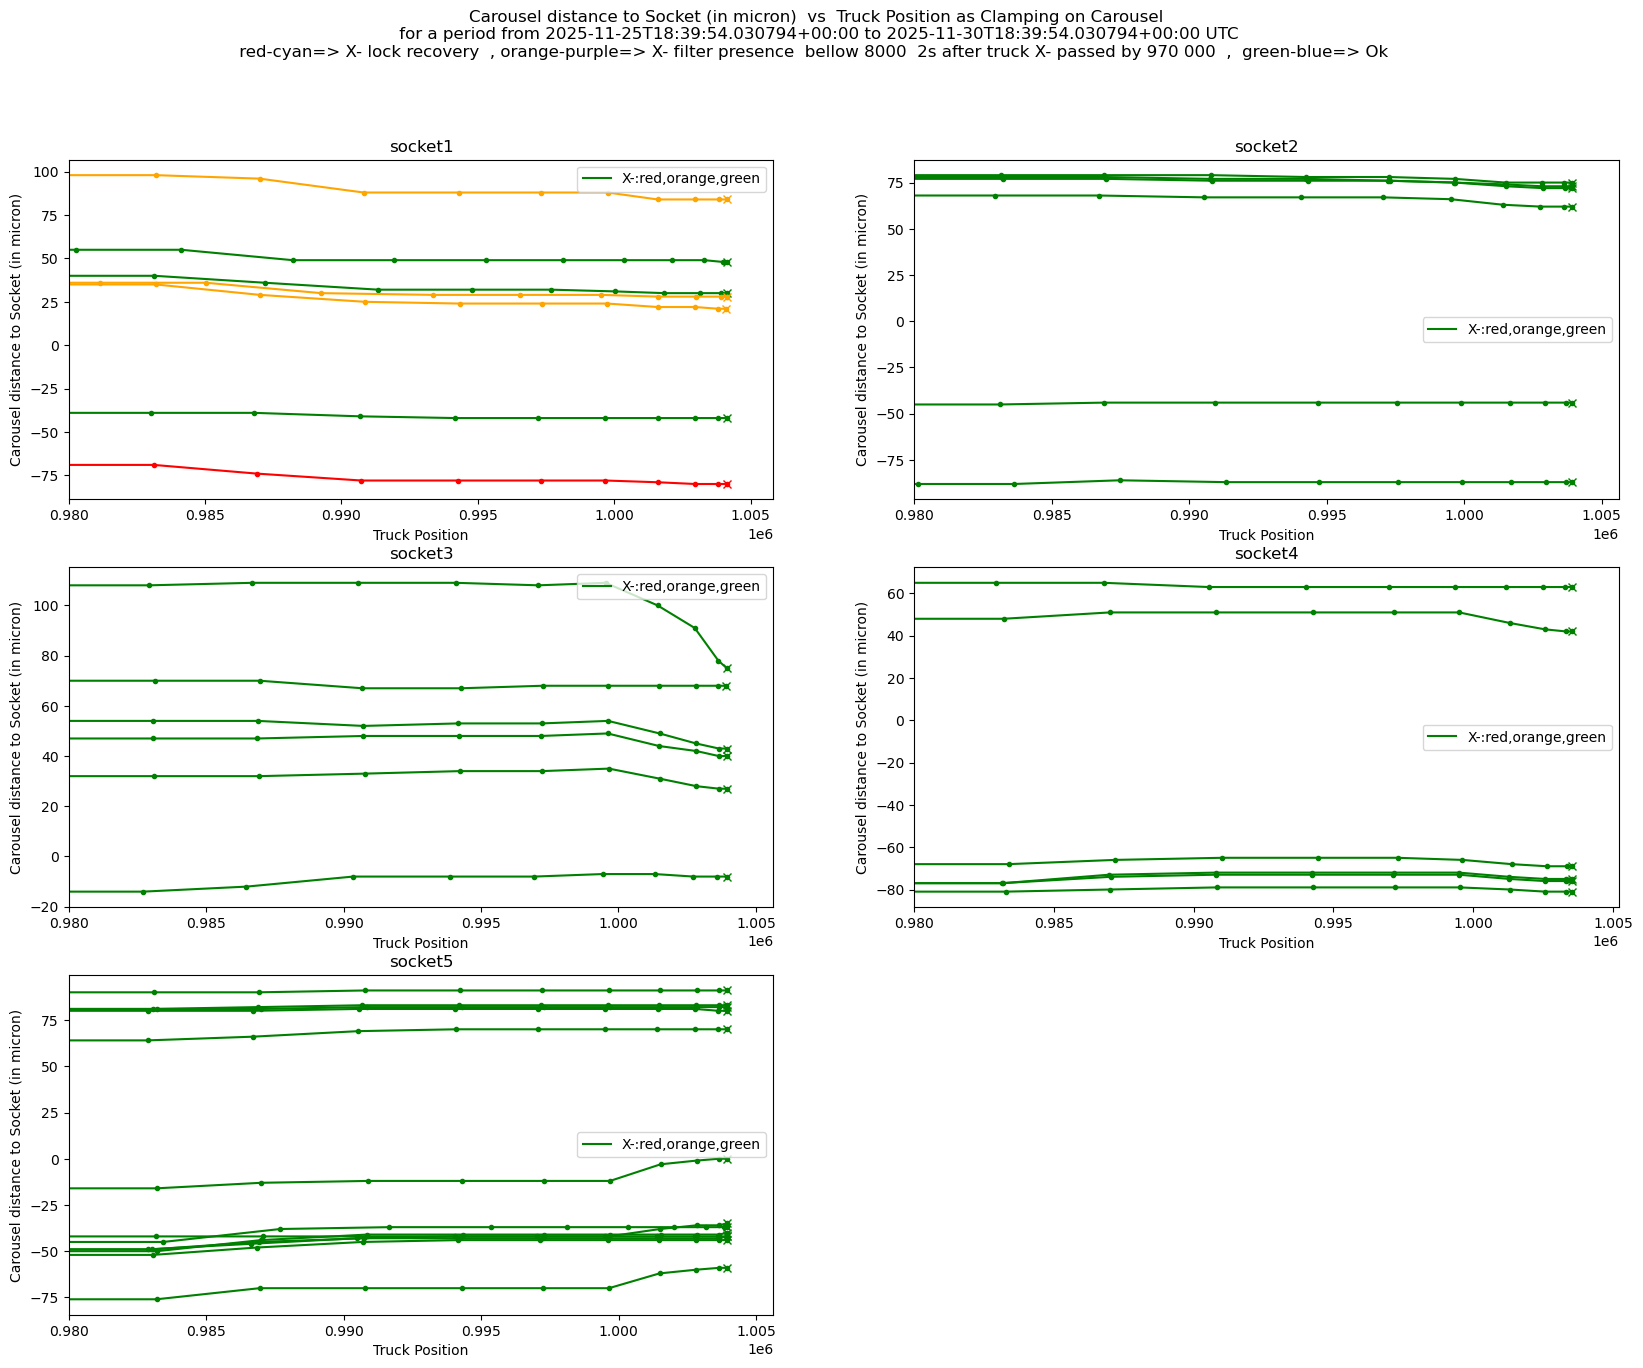

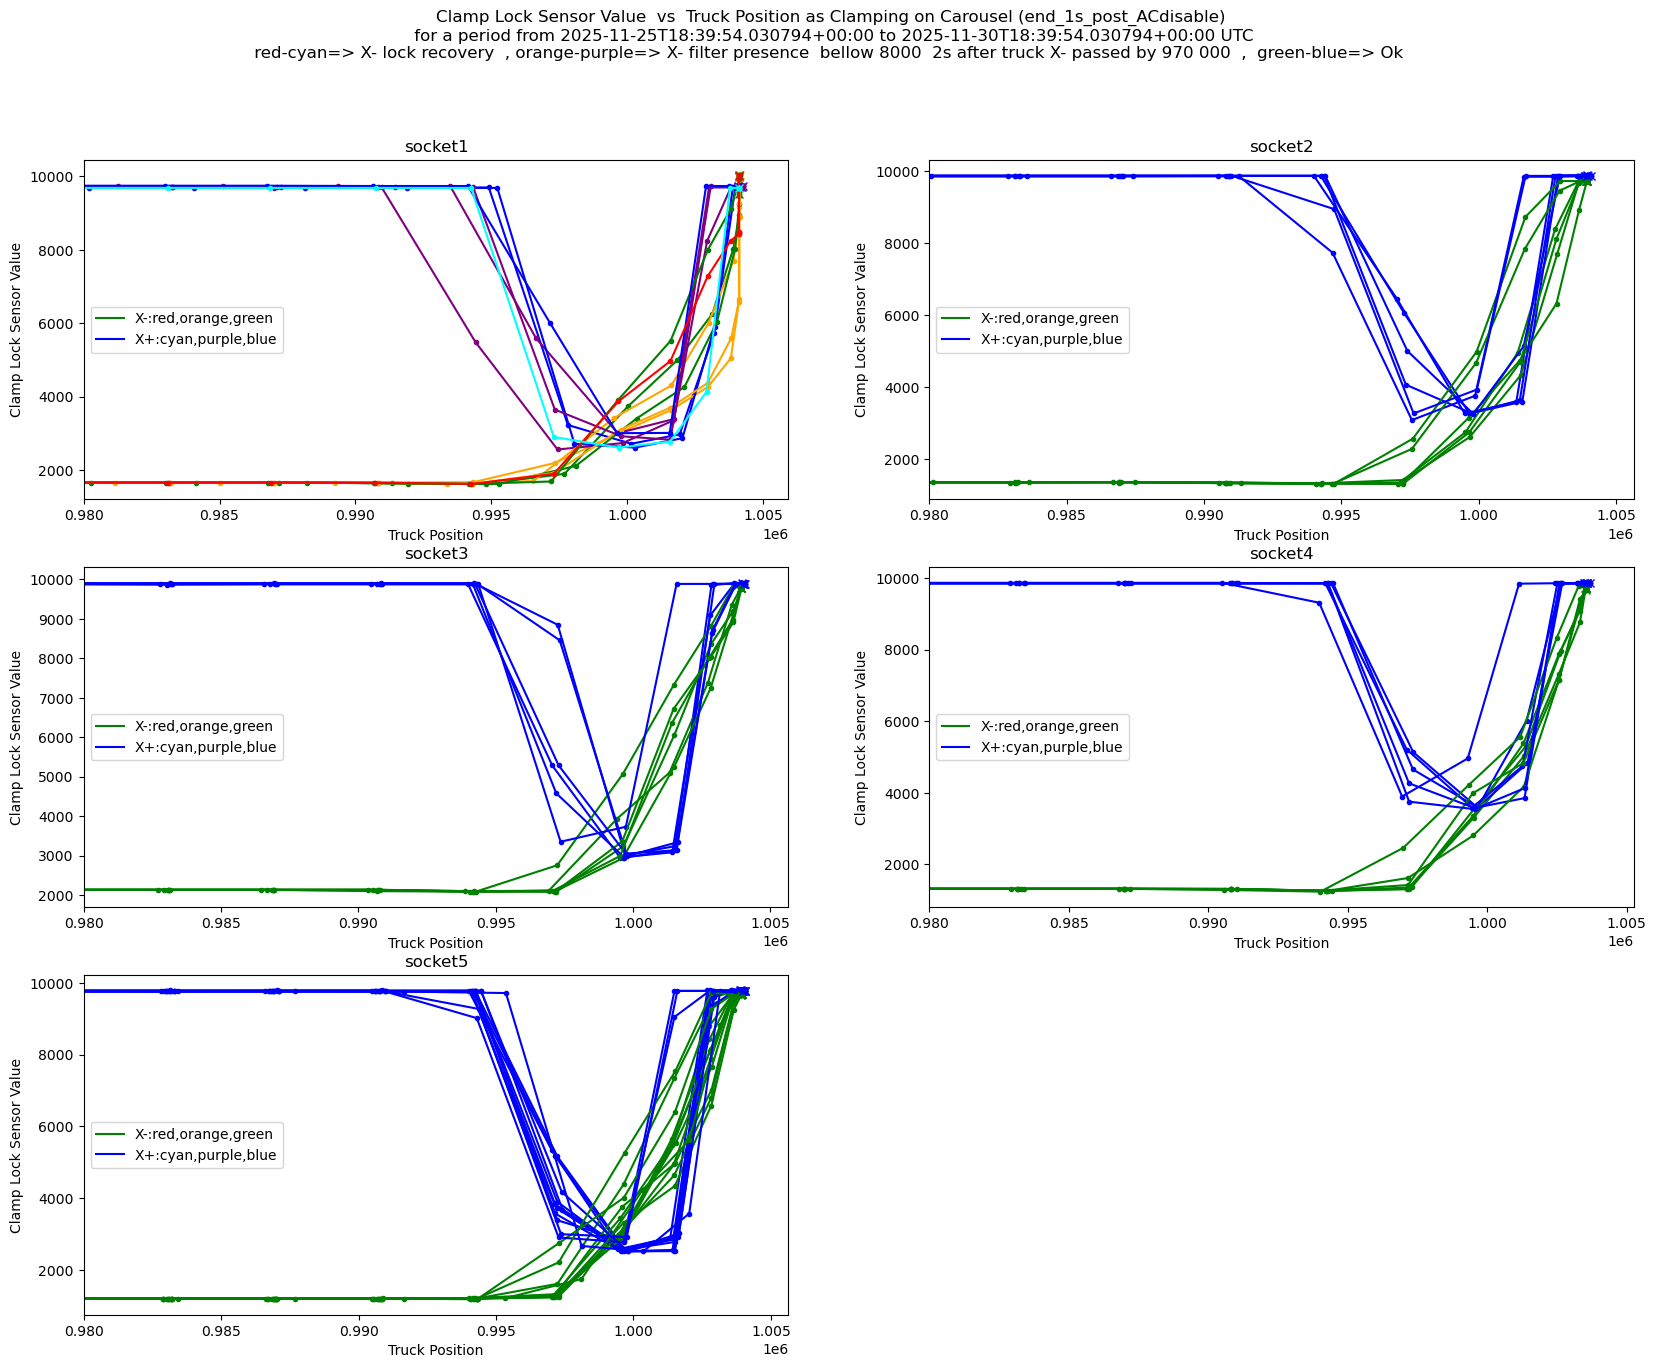

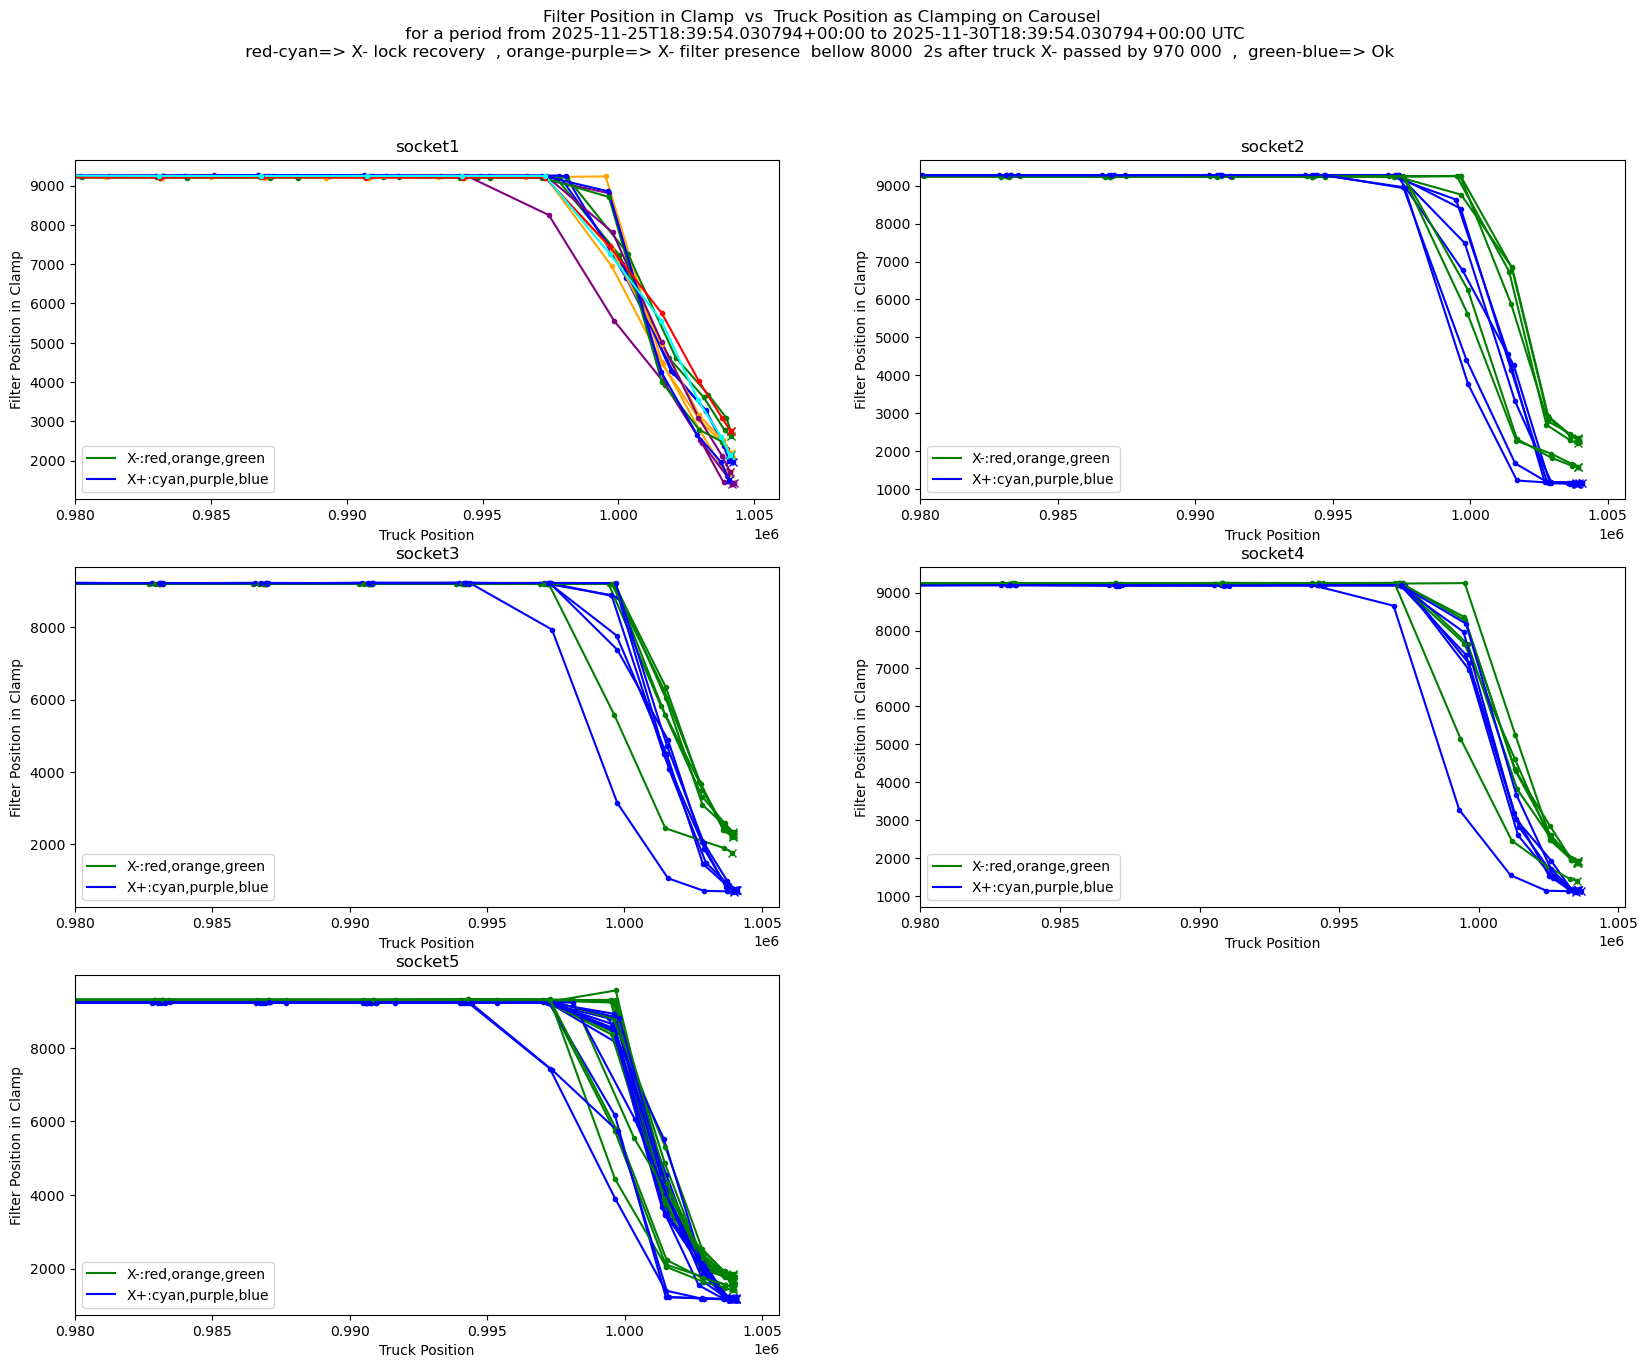

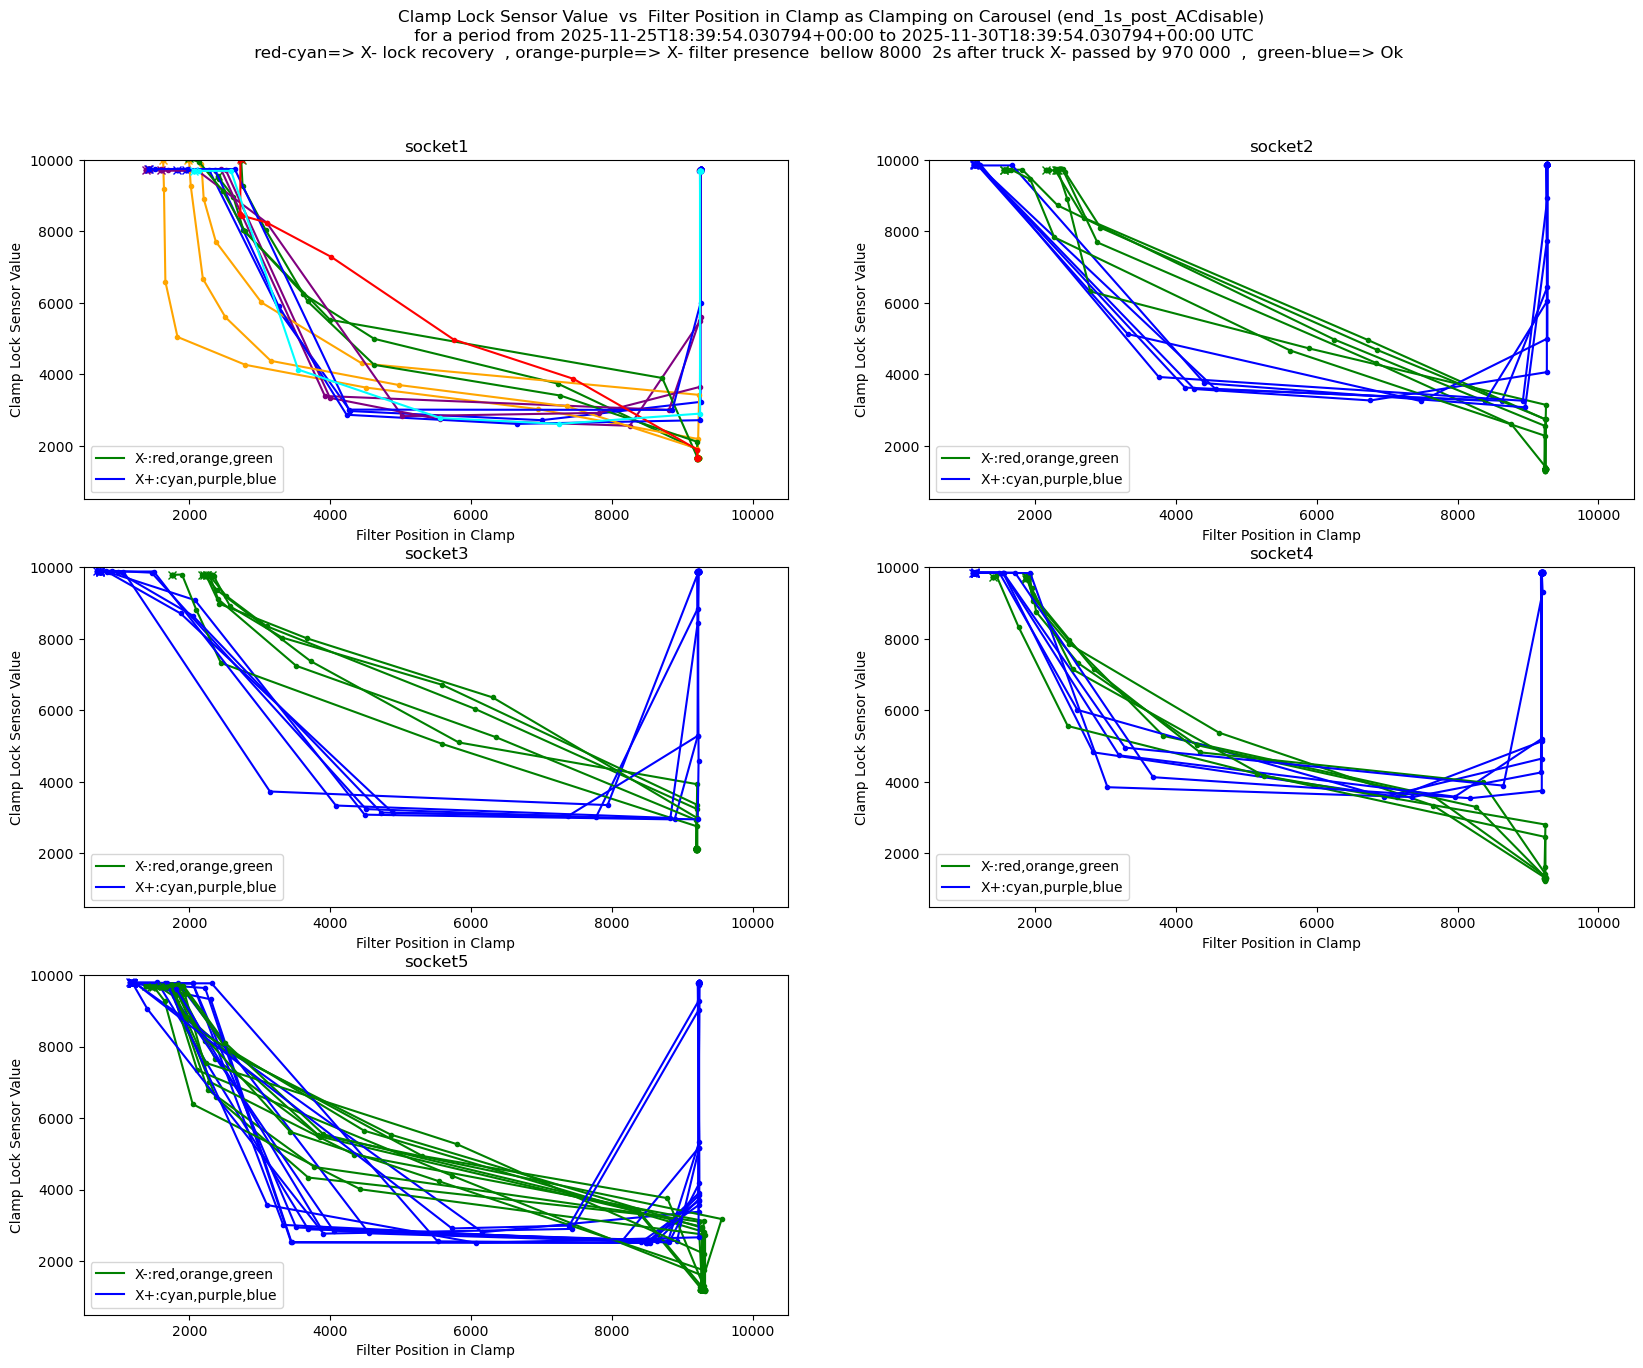

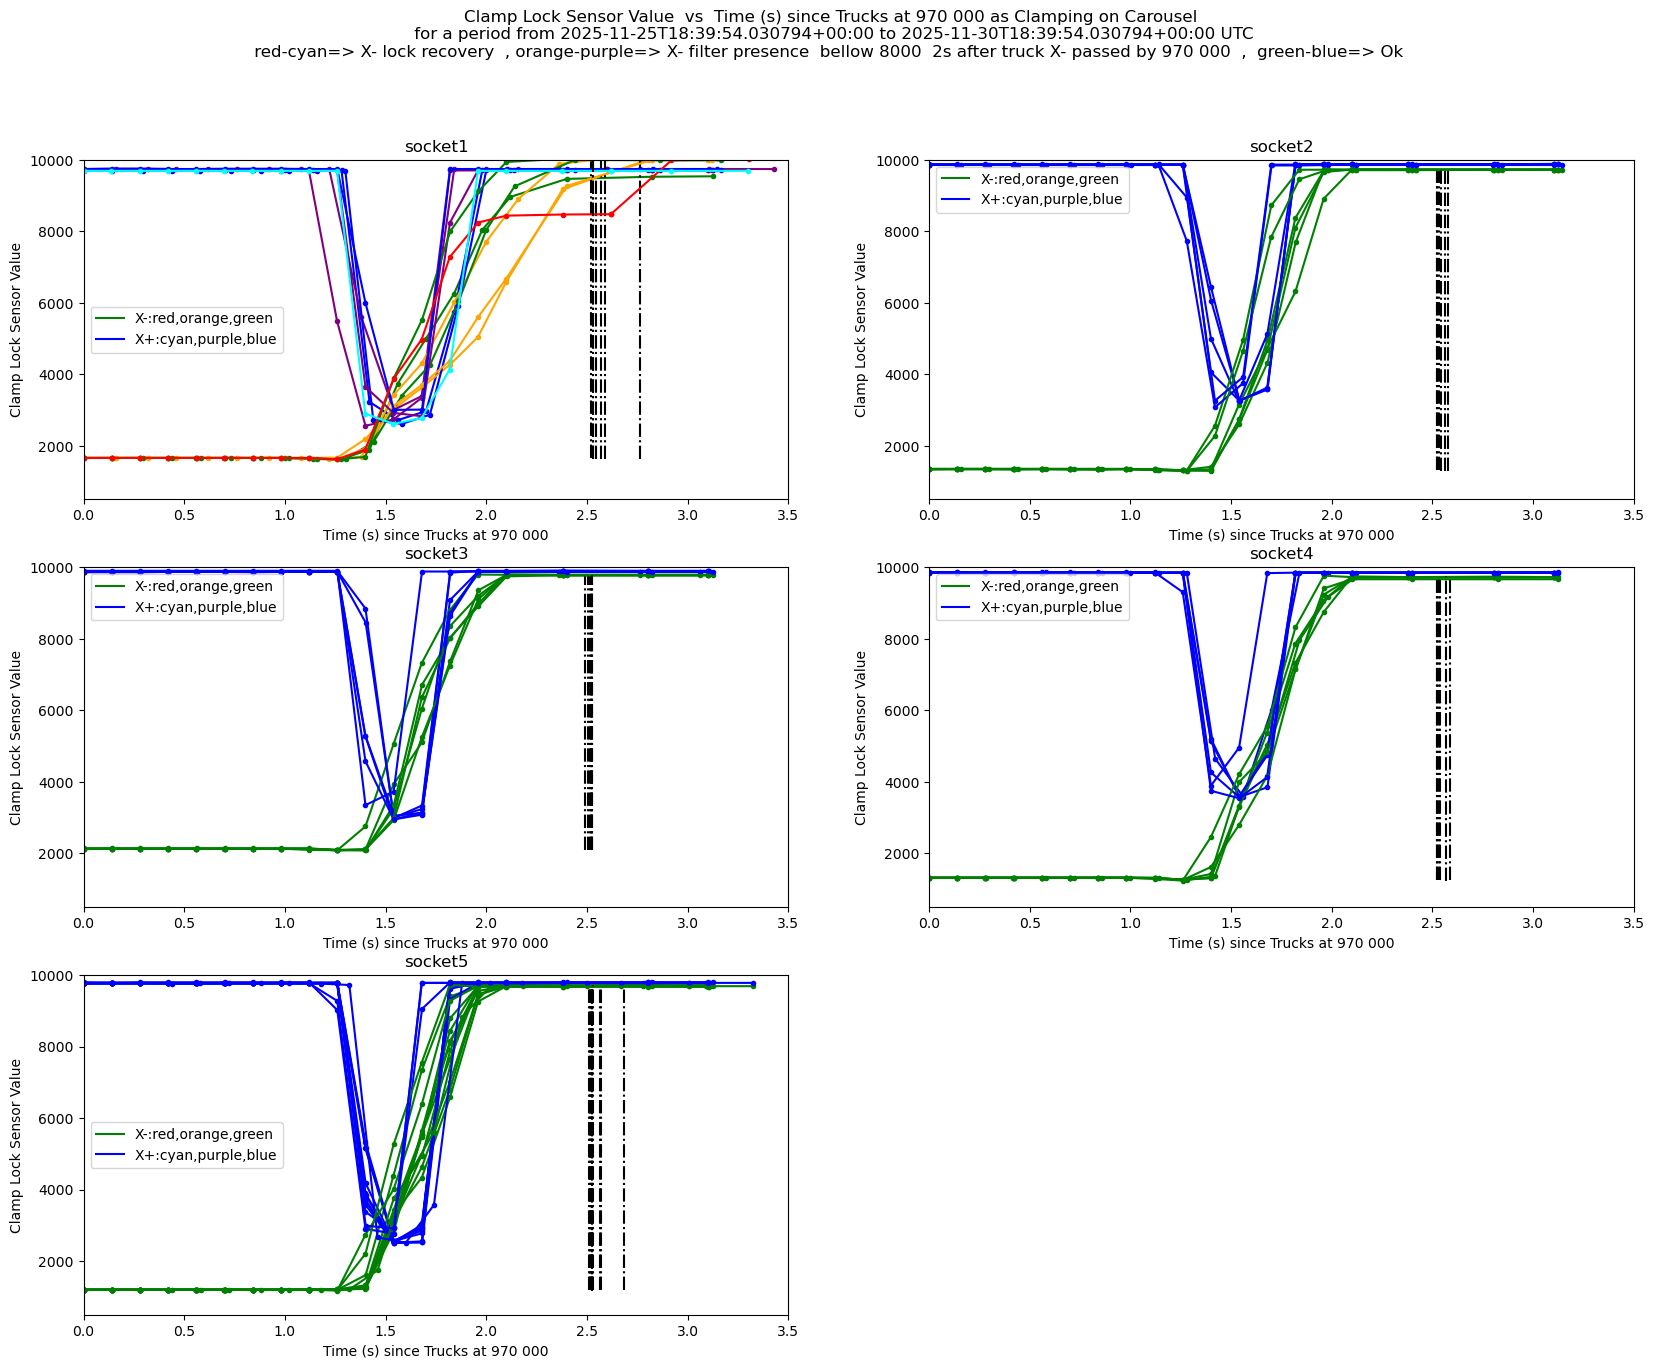

In [29]:
# Using iplt=20 , will recompute the X- - X+ truck position to have data after the trucks are stopped . 
plot_clamp(iplt=10,x='time',y='lockStatus_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,save_fig=save_fig,show_it=show_it)
plot_clamp(iplt=20,x='time',y='deltaDriverFollowerPosition',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,save_fig=save_fig,show_it=show_it)
#
plot_clamp(x='position_',y='velocity_',index_begin=indexcf_pre_standby,index_end=index_in_clamp,left=970000,save_fig=save_fig,show_it=show_it)
plot_clamp(x='velocity_',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,file_extra='end_1s_post_ACdisable',save_fig=save_fig,show_it=show_it)
plot_clamp(x='filterPositionSensorValue_cl',y='current_',index_begin=indexcf_pre_standby,index_end=index_in_clamp,left=500,right=9500,save_fig=save_fig,show_it=show_it)
plot_clamp(x='position_',y='current_',index_begin=indexcf_pre_standby,index_end=index_in_clamp,left=970000,save_fig=save_fig,show_it=show_it)
plot_clamp(iplt=1,x='position_',y='CarouselPosToSocket',index_begin=indexcf_pre_standby,index_end=index_in_clamp,left=980000,save_fig=save_fig,show_it=show_it)
plot_clamp(x='position_',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=980000,file_extra='end_1s_post_ACdisable',save_fig=save_fig,show_it=show_it)
plot_clamp(x='position_',y='filterPositionSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clamp,left=980000,save_fig=save_fig,show_it=show_it)
plot_clamp(x='filterPositionSensorValue_cl',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=500,right=10500,bottom=500,top=10000,file_extra='end_1s_post_ACdisable',save_fig=save_fig,show_it=show_it)
plot_clamp(iplt=10,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,bottom=500,top=10000,save_fig=save_fig,show_it=show_it)
#plot_clamp(iplt=10,x='time',y='deltaDriverFollowerPosition',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,save_fig=save_fig,show_it=show_it)


In [27]:
if not(OverViewOnly) : 
    # those plots are more oriented to find correlation in case of glitch and are better use for day only
    plot_clamp(x='velocity_',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clamp,save_fig=save_fig,show_it=show_it)
    plot_clamp(x='position_',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clamp,left=980000,save_fig=save_fig,show_it=show_it)
    plot_clamp(iplt=11,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,save_fig=save_fig,show_it=show_it)
    plot_clamp(iplt=12,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,label_type=2,save_fig=save_fig,show_it=show_it)
    plot_clamp(iplt=13,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,label_type=2,save_fig=save_fig,show_it=show_it)
    plot_clamp(iplt=14,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,label_type=2,save_fig=save_fig,show_it=show_it)
    plot_clamp(iplt=15,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,label_type=2,save_fig=save_fig,show_it=show_it)
    #plot_clamp(iplt=16,x='time',y='lockSensorValue_cl',index_begin=indexcf_pre_standby,delta_begin=closer_unclamp,index_end=index_in_clampp1s,left=0,right=3.5,label_type=2,save_fig=save_fig,show_it=show_it)
    plot_clamp(iplt=10,x='time',y='deltaDriverFollowerPosition',index_begin=indexcf_pre_standby,index_end=index_in_clampp1s,left=0,right=3.5,save_fig=save_fig,show_it=show_it)
